# Business Case: Walmart - Confidence Interval and CLT

### About Walmart
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

In [95]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from scipy import stats
from scipy.stats import norm

#### 1. Defining Problem Statement and Analyzing basic metrics (10 Points)
1. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary
2. Non-Graphical Analysis: Value counts and unique attributes ​
3. Visual Analysis - Univariate & Bivariate
    a. For continuous variable(s): Distplot, countplot, histogram for univariate analysis
    b. For categorical variable(s): Boxplot
    c. For correlation: Heatmaps, Pairplots
    
    
#### 2. Missing Value & Outlier Detection (10 Points)

#### 3. Business Insights based on Non- Graphical and Visual Analysis (10 Points) 
    Comments on the range of attributes 
    Comments on the distribution of the variables and relationship between them 
    Comments for each univariate and bivariate plot 

### Business Problem
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [2]:
df = pd.read_csv("walmart_data.csv")

In [3]:
df.shape

(550068, 10)

In [4]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

In [5]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

converting the below columns to object as they are not numeric variables, they dont have any incremental value effect


In [20]:
df['User_ID'] = df['User_ID'].apply(str)
df['Occupation'] = df['Occupation'].apply(str)
df['Product_Category'] = df['Product_Category'].apply(str)
df['Marital_Status'] = df['Marital_Status'].apply(str)

In [21]:
df.dtypes

User_ID                       object
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

In [22]:
df.info() # we dont have any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [23]:
(df.describe().T).round(2)

count     mean      std   min     25%     50%      75%      max
Purchase  550068.0  9263.97  5023.07  12.0  5823.0  8047.0  12054.0  23961.0

In [26]:
df.describe(include='object').T

count unique        top    freq
User_ID                     550068   5891    1001680    1026
Product_ID                  550068   3631  P00265242    1880
Gender                      550068      2          M  414259
Age                         550068      7      26-35  219587
Occupation                  550068     21          4   72308
City_Category               550068      3          B  231173
Stay_In_Current_City_Years  550068      5          1  193821
Marital_Status              550068      2          0  324731
Product_Category            550068     20          5  150933

In [258]:
print("Number of users : ", df['User_ID'].nunique())
print("There are users who purchased huge number of products like in the range of 250-1000")
df['User_ID'].value_counts()

Number of users :  5891
There are users who purchased huge number of products like in the range of 250-1000


1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [257]:
print("Number of Products : ", df['Product_ID'].nunique())
print("Products which purchased more frequently")
df['Product_ID'].value_counts()

Number of Products :  3631
Products which purchased more frequently


P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [35]:
print("Number of Genders : ", df['Gender'].nunique())
df['Gender'].value_counts()

Number of Gender :  2


M    414259
F    135809
Name: Gender, dtype: int64

In [39]:
print("Number of Ages : ", df['Age'].nunique())
df['Age'].value_counts()

Number of Ages :  7


26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [40]:
print("Number of Occupations : ", df['Occupation'].nunique())
df['Occupation'].value_counts()

Number of Occupations :  21


4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [41]:
print("Number of City_Category : ", df['City_Category'].nunique())
df['City_Category'].value_counts()

Number of City_Category :  3


B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [42]:
print("Number of Stay_In_Current_City_Years : ", df['Stay_In_Current_City_Years'].nunique())
df['Stay_In_Current_City_Years'].value_counts()

Number of Stay_In_Current_City_Years :  5


1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [43]:
print("Number of Marital_Status : ", df['Marital_Status'].nunique())
df['Marital_Status'].value_counts()

Number of Marital_Status :  2


0    324731
1    225337
Name: Marital_Status, dtype: int64

In [44]:
print("Number of Product_Category : ", df['Product_Category'].nunique())
df['Product_Category'].value_counts()

Number of Product_Category :  20


5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

Here we will do user level analysis, so we remove purchase related data and drop duplicates to get that

In [48]:
user_df = df[['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']].drop_duplicates().reset_index(drop=True)

In [49]:
user_df.head()

User_ID Gender    Age Occupation City_Category Stay_In_Current_City_Years  \
0  1000001      F   0-17         10             A                          2   
1  1000002      M    55+         16             C                         4+   
2  1000003      M  26-35         15             A                          3   
3  1000004      M  46-50          7             B                          2   
4  1000005      M  26-35         20             A                          1   

  Marital_Status  
0              0  
1              0  
2              0  
3              1  
4              1

In [312]:
t_df = (user_df['Gender'].value_counts(normalize=True)*100).round(0).reset_index()
t_df.columns = ['Gender','counts']

In [313]:
s_vc = user_df['Gender'].value_counts()
s_vc

M    4225
F    1666
Name: Gender, dtype: int64

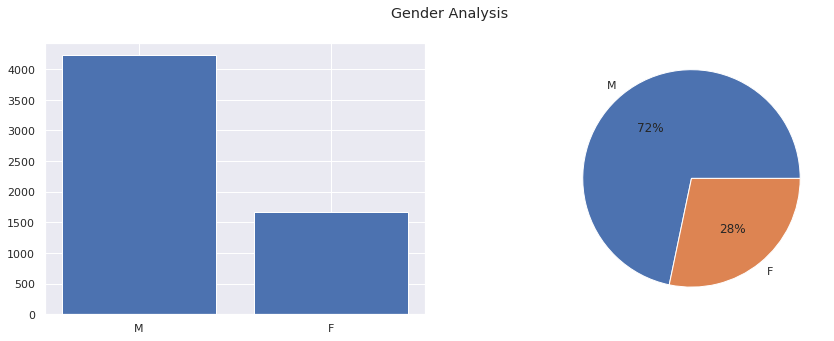

In [315]:
fig, axs = plt.subplots(1, 2 , figsize =(15, 5))
fig.suptitle('Gender Analysis')
axs[0].bar(s_vc.index,s_vc.values)
axs[1].pie(s_vc.values,labels=s_vc.index, autopct='%1.0f%%')
plt.show()

72% of the customers are Males and 28% of the customers are Females

In [337]:
t_df = (user_df['Age'].value_counts(normalize=True)*100).round(0).reset_index()
t_df.columns = ['Age','counts']

In [338]:
s_vc = user_df['Age'].value_counts()
s_vc

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [343]:
s_vc = s_vc.loc[[ '0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']]

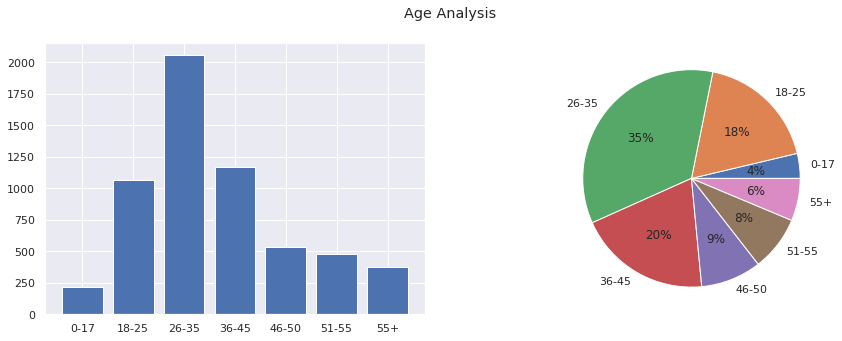

In [344]:
fig, axs = plt.subplots(1, 2 , figsize =(15, 5))
fig.suptitle('Age Analysis')

axs[0].bar(s_vc.index,s_vc.values)
axs[1].pie(s_vc.values,labels=s_vc.index, autopct='%1.0f%%')
plt.show()

18-45 age groups has a user base of 73%, 26-35 age group has 35% of users, age group above 45 has only 23% of userbase and 0-17 has 4%

In [358]:
t_df = (user_df['Occupation'].value_counts(normalize=True)*100).round(0).reset_index()
t_df.columns = ['Occupation','counts']

In [359]:
s_vc = user_df['Occupation'].value_counts()
s_vc

4     740
0     688
7     669
1     517
17    491
12    376
14    294
20    273
2     256
16    235
6     228
10    192
3     170
15    140
13    140
11    128
5     111
9      88
19     71
18     67
8      17
Name: Occupation, dtype: int64

In [299]:
s_vc = user_df.head()
s_vc

User_ID Gender    Age Occupation City_Category Stay_In_Current_City_Years  \
0  1000001      F   0-17         10             A                          2   
1  1000002      M    55+         16             C                         4+   
2  1000003      M  26-35         15             A                          3   
3  1000004      M  46-50          7             B                          2   
4  1000005      M  26-35         20             A                          1   

  Marital_Status  
0              0  
1              0  
2              0  
3              1  
4              1

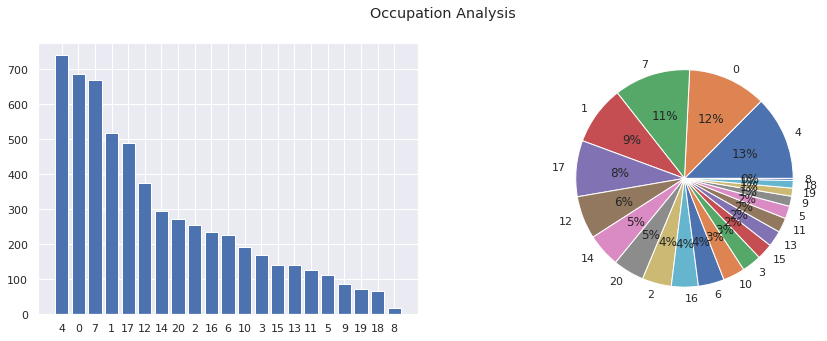

In [360]:
fig, axs = plt.subplots(1, 2 , figsize =(15, 5))
fig.suptitle('Occupation Analysis')
axs[0].bar(s_vc.index,s_vc.values)
axs[1].pie(s_vc.values,labels=s_vc.index, autopct='%1.0f%%')
plt.show()

Top 5 Occupations contribute to 53% of the Customers and top 3 contributes to 36% of the Customers

In [361]:
t_df = (user_df['City_Category'].value_counts(normalize=True)*100).round(0).reset_index()
t_df.columns = ['City_Category','counts']

In [362]:
s_vc = user_df['City_Category'].value_counts()
s_vc

C    3139
B    1707
A    1045
Name: City_Category, dtype: int64

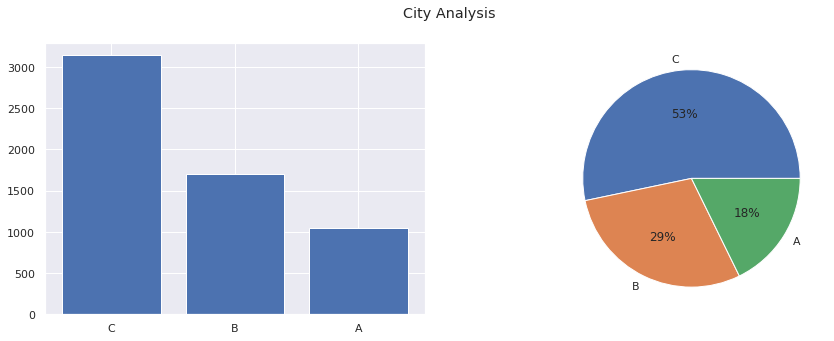

In [363]:
fig, axs = plt.subplots(1, 2 , figsize =(15, 5))
fig.suptitle('City Analysis')
axs[0].bar(s_vc.index,s_vc.values)
axs[1].pie(s_vc.values,labels=s_vc.index, autopct='%1.0f%%')
plt.show()

City C contribute to 53% of the Customer base

In [350]:
t_df = (user_df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100).round(0).reset_index()
t_df.columns = ['Stay_In_Current_City_Years','counts']

In [351]:
s_vc = user_df['Stay_In_Current_City_Years'].value_counts()
s_vc

1     2086
2     1145
3      979
4+     909
0      772
Name: Stay_In_Current_City_Years, dtype: int64

In [354]:
s_vc = s_vc.loc[['0', '1', '2', '3', '4+']]

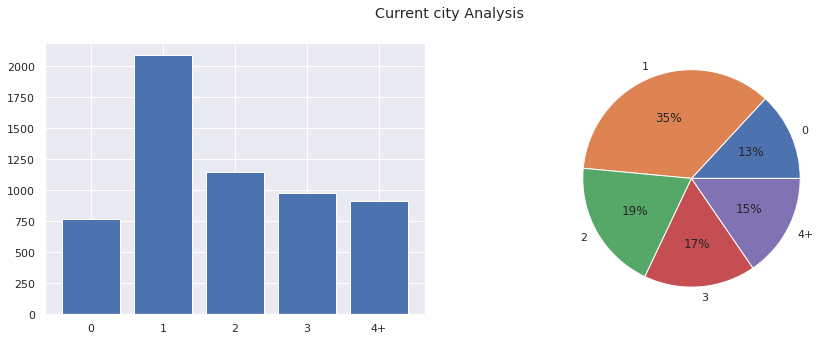

In [355]:
fig, axs = plt.subplots(1, 2 , figsize =(15, 5))
fig.suptitle('Current city Analysis')
axs[0].bar(s_vc.index,s_vc.values)
axs[1].pie(s_vc.values,labels=s_vc.index, autopct='%1.0f%%')
plt.show()

54% of the customers stay in the current city for around 1 year or less

In [326]:
t_df = (user_df['Marital_Status'].value_counts(normalize=True)*100).round(0).reset_index()
t_df.columns = ['Marital_Status','counts']

In [327]:
s_vc = user_df['Marital_Status'].value_counts()
s_vc

0    3417
1    2474
Name: Marital_Status, dtype: int64

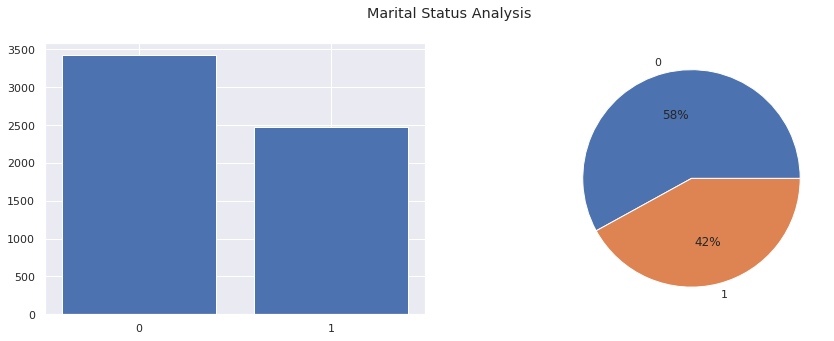

In [328]:
fig, axs = plt.subplots(1, 2 , figsize =(15, 5))
fig.suptitle('Marital Status Analysis')
axs[0].bar(s_vc.index,s_vc.values)
axs[1].pie(s_vc.values,labels=s_vc.index, autopct='%1.0f%%')
plt.show()

58% of the customers are unmarried

In [124]:
df.head()

User_ID Product_ID Gender   Age Occupation City_Category  \
0  1000001  P00069042      F  0-17         10             A   
1  1000001  P00248942      F  0-17         10             A   
2  1000001  P00087842      F  0-17         10             A   
3  1000001  P00085442      F  0-17         10             A   
4  1000002  P00285442      M   55+         16             C   

  Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
0                          2              0                3      8370  
1                          2              0                1     15200  
2                          2              0               12      1422  
3                          2              0               12      1057  
4                         4+              0                8      7969

### Sales Analysis

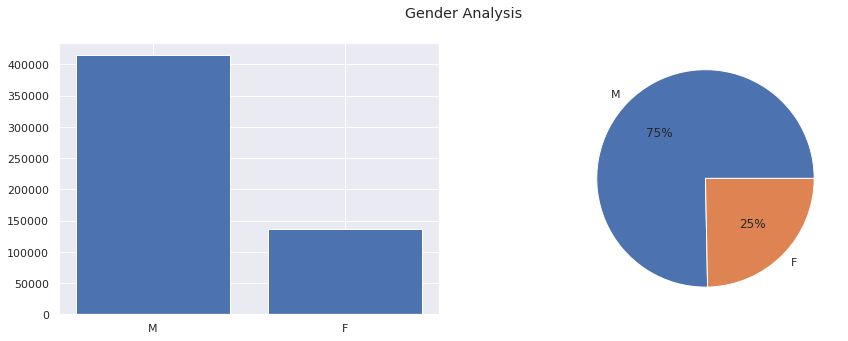

In [330]:
s_vc = df['Gender'].value_counts()
fig, axs = plt.subplots(1, 2 , figsize =(15, 5))
fig.suptitle('Gender Analysis')
axs[0].bar(s_vc.index,s_vc.values)
axs[1].pie(s_vc.values,labels=s_vc.index, autopct='%1.0f%%')
plt.show()

75% of the of the purchases are made by Males

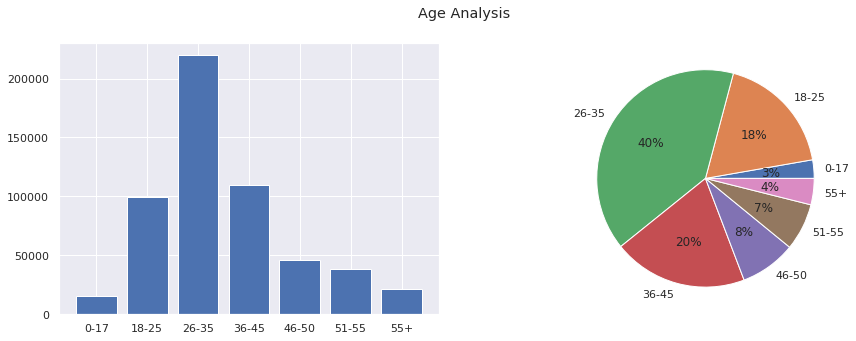

In [356]:
s_vc = df['Age'].value_counts()
s_vc = s_vc.loc[[ '0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']]
fig, axs = plt.subplots(1, 2 , figsize =(15, 5))
fig.suptitle('Age Analysis')
axs[0].bar(s_vc.index,s_vc.values)
axs[1].pie(s_vc.values,labels=s_vc.index, autopct='%1.0f%%')
plt.show()

78% of the purchases are made by the age groups between 18-45 and age group 26-35 contributo 40% of te purchases

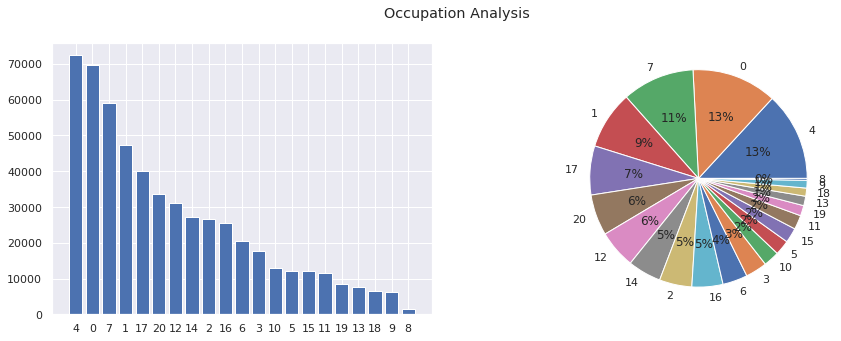

In [332]:
s_vc = df['Occupation'].value_counts()
fig, axs = plt.subplots(1, 2 , figsize =(15, 5))
fig.suptitle('Occupation Analysis')
axs[0].bar(s_vc.index,s_vc.values)
axs[1].pie(s_vc.values,labels=s_vc.index, autopct='%1.0f%%')
plt.show()

53% of the sales are from top 5 occupations

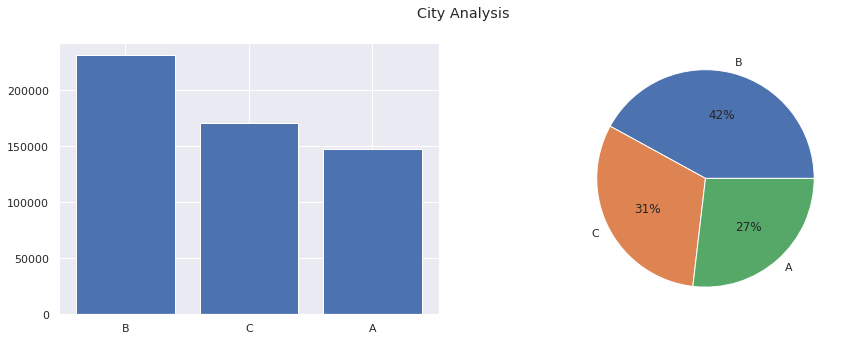

In [333]:
s_vc = df['City_Category'].value_counts()
fig, axs = plt.subplots(1, 2 , figsize =(15, 5))
fig.suptitle('City Analysis')
axs[0].bar(s_vc.index,s_vc.values)
axs[1].pie(s_vc.values,labels=s_vc.index, autopct='%1.0f%%')
plt.show()

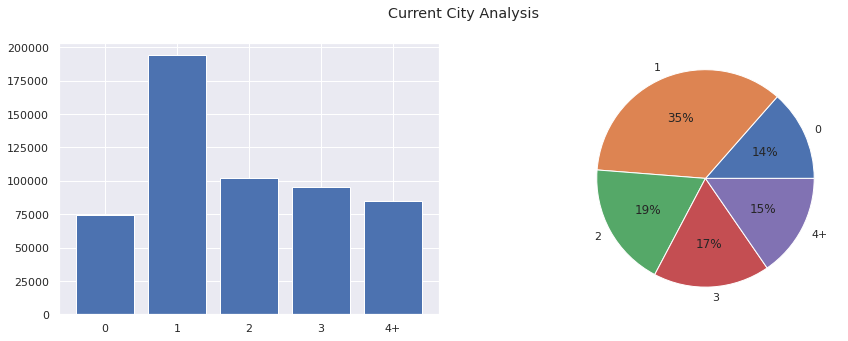

In [357]:
s_vc = df['Stay_In_Current_City_Years'].value_counts()
s_vc = s_vc.loc[['0', '1', '2', '3', '4+']]
fig, axs = plt.subplots(1, 2 , figsize =(15, 5))
fig.suptitle('Current City Analysis')
axs[0].bar(s_vc.index,s_vc.values)
axs[1].pie(s_vc.values,labels=s_vc.index, autopct='%1.0f%%')
plt.show()

49% of the purchases are from people who are living in current city for around 1 year or less

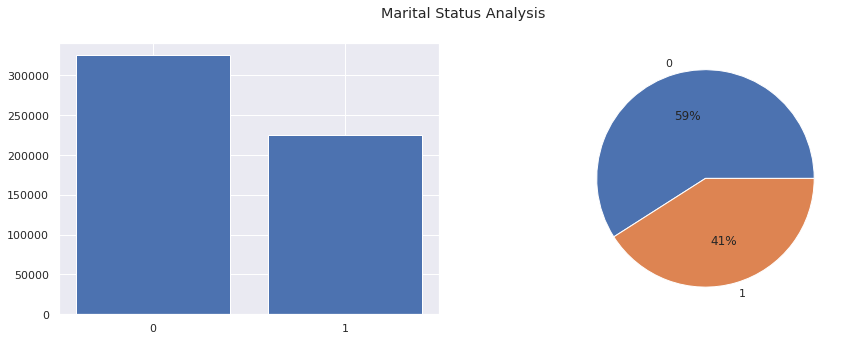

In [335]:
s_vc = df['Marital_Status'].value_counts()
fig, axs = plt.subplots(1, 2 , figsize =(15, 5))
fig.suptitle('Marital Status Analysis')
axs[0].bar(s_vc.index,s_vc.values)
axs[1].pie(s_vc.values,labels=s_vc.index, autopct='%1.0f%%')
plt.show()

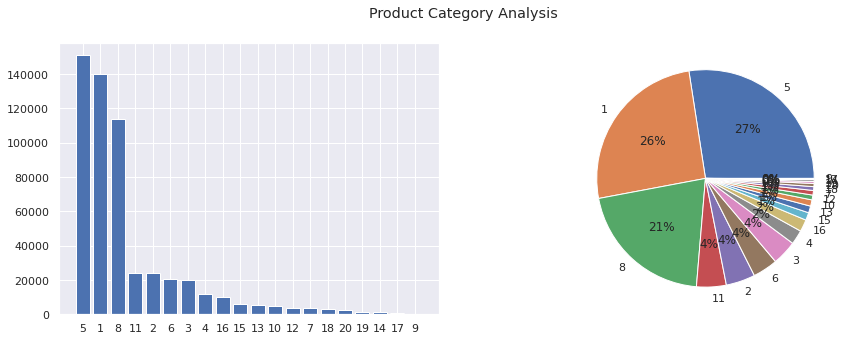

In [336]:
s_vc = df['Product_Category'].value_counts()
fig, axs = plt.subplots(1, 2 , figsize =(15, 5))
fig.suptitle('Product Category Analysis')
axs[0].bar(s_vc.index,s_vc.values)
axs[1].pie(s_vc.values,labels=s_vc.index, autopct='%1.0f%%')
plt.show()

74% of the purchases are from top 3 categories

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

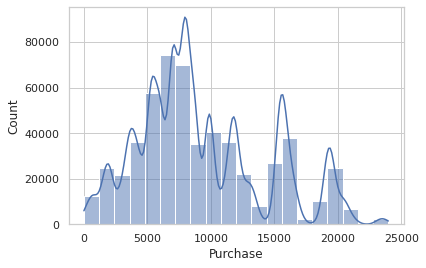

In [142]:
sns.histplot(x="Purchase",data=df,kde=True,bins=20)

Purchase value for each purchase is normally distributed and right skewed

In [145]:
df.head()

User_ID Product_ID Gender   Age Occupation City_Category  \
0  1000001  P00069042      F  0-17         10             A   
1  1000001  P00248942      F  0-17         10             A   
2  1000001  P00087842      F  0-17         10             A   
3  1000001  P00085442      F  0-17         10             A   
4  1000002  P00285442      M   55+         16             C   

  Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
0                          2              0                3      8370  
1                          2              0                1     15200  
2                          2              0               12      1422  
3                          2              0               12      1057  
4                         4+              0                8      7969

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

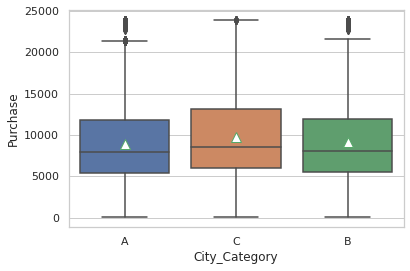

In [149]:
sns.boxplot(x='City_Category',y='Purchase',data=df,showmeans=True,meanprops={"markerfacecolor":"white","markersize":"10"})

<AxesSubplot:xlabel='Product_Category', ylabel='Purchase'>

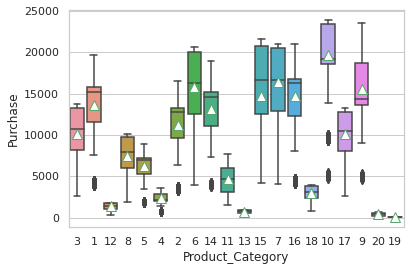

In [152]:
sns.boxplot(x='Product_Category',y='Purchase',data=df,showmeans=True,meanprops={"markerfacecolor":"white","markersize":"10"})

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

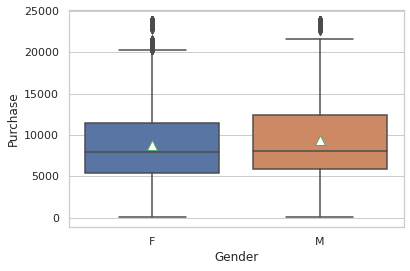

In [153]:
sns.boxplot(x='Gender',y='Purchase',data=df,showmeans=True,meanprops={"markerfacecolor":"white","markersize":"10"})

Mostly for all the variables except for ProductCategory the outliers are at high purchase values
For Product Category 1,5,2,14,16,10,9 there are outloers at the lower end

In [185]:
df.head()

User_ID Product_ID Gender   Age Occupation City_Category  \
0  1000001  P00069042      F  0-17         10             A   
1  1000001  P00248942      F  0-17         10             A   
2  1000001  P00087842      F  0-17         10             A   
3  1000001  P00085442      F  0-17         10             A   
4  1000002  P00285442      M   55+         16             C   

  Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
0                          2              0                3      8370  
1                          2              0                1     15200  
2                          2              0               12      1422  
3                          2              0               12      1057  
4                         4+              0                8      7969

<AxesSubplot:xlabel='Age'>

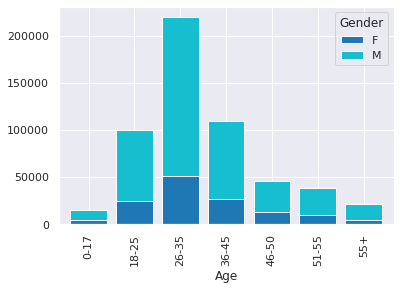

In [367]:
(df
    .groupby(['Age', 'Gender'])
    .User_ID
    .count()
    .unstack()
).plot(kind='bar', stacked=True, color=['tab:blue', 'tab:cyan'], width=0.8)


<AxesSubplot:xlabel='City_Category'>

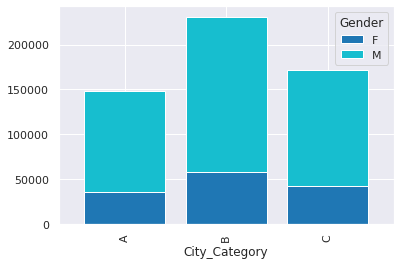

In [380]:
(df
    .groupby(['City_Category', 'Gender'])
    .User_ID
    .count()
    .unstack()
).plot(kind='bar', stacked=True, color=['tab:blue', 'tab:cyan'], width=0.8)


<AxesSubplot:xlabel='Marital_Status'>

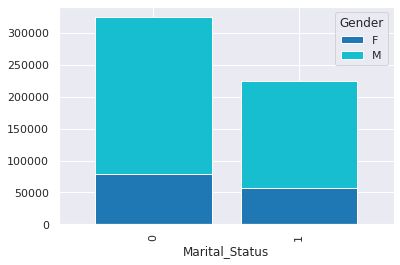

In [382]:
(df
    .groupby(['Marital_Status', 'Gender'])
    .User_ID
    .count()
    .unstack()
).plot(kind='bar', stacked=True, color=['tab:blue', 'tab:cyan'], width=0.8)


In [158]:
temp_df = df.copy(deep=True)

In [172]:
temp_df['Gender'].replace({"F":0,"M":1},inplace=True)
temp_df['Age'].replace(dict(zip(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],[0,6,2,4,5,3,1])),inplace=True)
temp_df['Occupation'] = temp_df['Occupation'].apply(int)
temp_df['Stay_In_Current_City_Years']=temp_df['Stay_In_Current_City_Years'].replace({'4+':4}).apply(int)
temp_df['Marital_Status']=temp_df['Marital_Status'].apply(int)

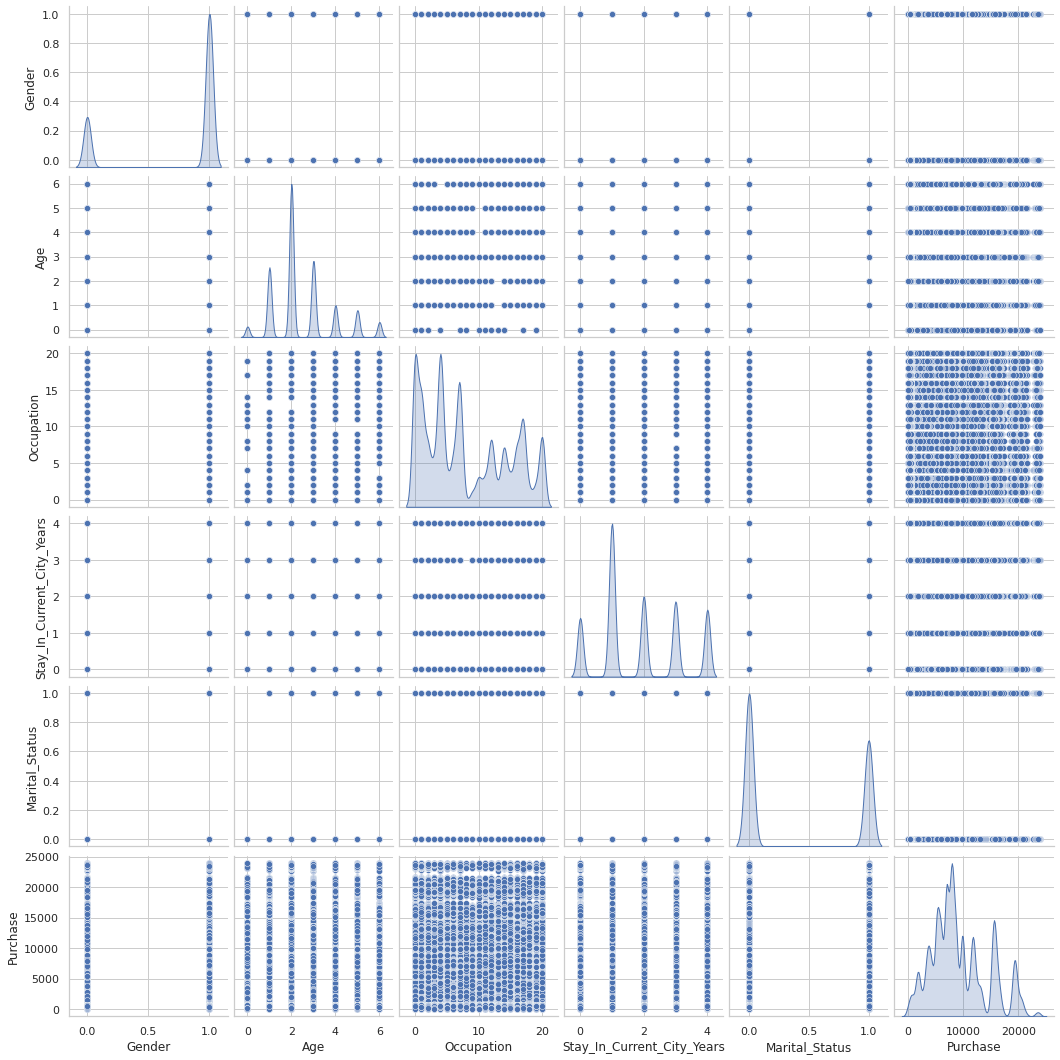

In [176]:
sns.pairplot(data=temp_df,diag_kind='kde')

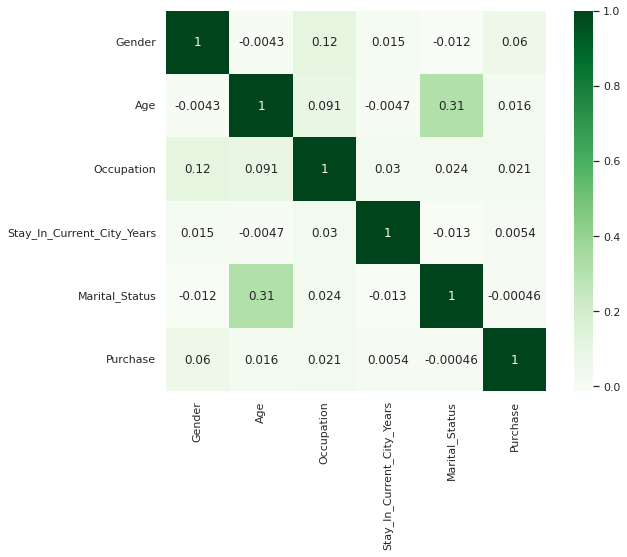

In [175]:
plt.figure(figsize = (10, 7))
ax = sns.heatmap(temp_df.corr(),
            annot=True,cmap='Greens',square=True)

We dont find any significant correlations between any variables here, only age is positively correlated with Maritial status with 0.3 value

#### 4. Answering questions (50 Points) 
    a. Are women spending more money per transaction than men? Why or Why not? (10 Points)
    b. Confidence intervals and distribution of the mean of expenses by female and male customers (10 Points) 
    c. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? (10 Points) 
    d. Results when the same activity is performed for Married vs Unmarried (10 Points) 
    e. Results when the same activity is performed for Age (10 Points)
    
#### 5. Final Insights (10 Points) - Illustrate the insights based on exploration and CLT
    a. Comments on the distribution of the variables and relationship between them
    b. Comments for each univariate and bivariate plots
    c. Comments on different variables when generalizing it for Population

In [179]:
df.groupby(['Gender'])['Purchase'].describe().round(2)

count     mean      std   min     25%     50%      75%      max
Gender                                                                    
F       135809.0  8734.57  4767.23  12.0  5433.0  7914.0  11400.0  23959.0
M       414259.0  9437.53  5092.19  12.0  5863.0  8098.0  12454.0  23961.0

In [194]:
m_df = df.loc[df['Gender']=='M']
f_df = df.loc[df['Gender']=='F']

### Confidence Interval analysis on Gender 
#### CI for 90%

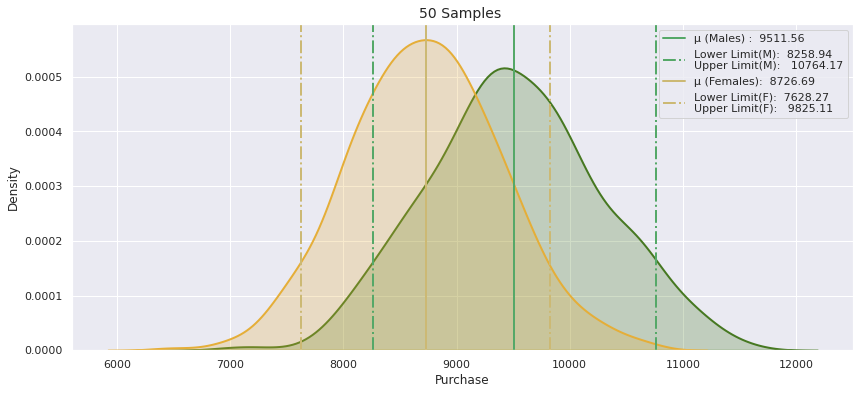

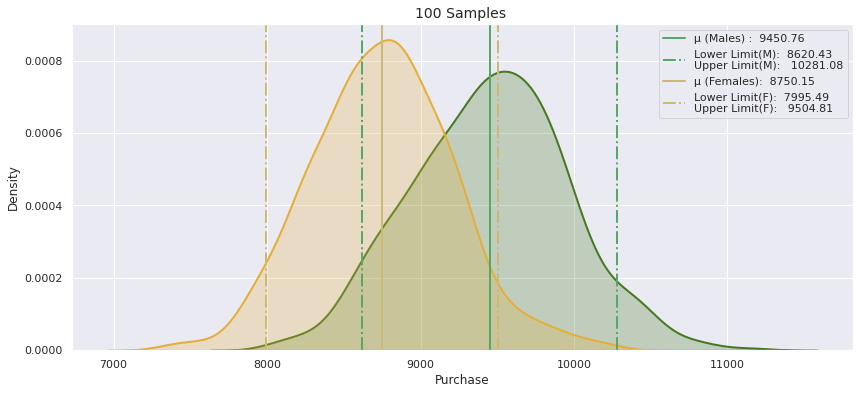

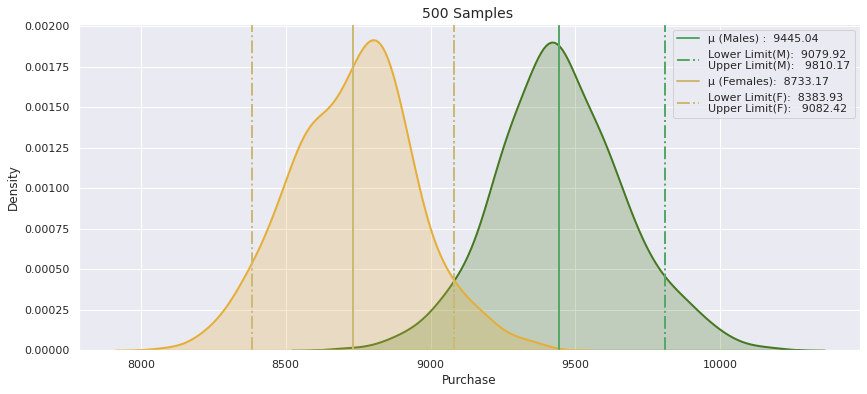

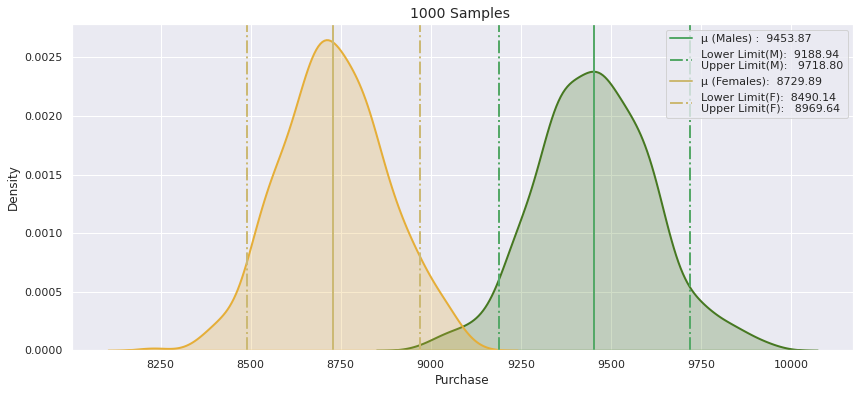

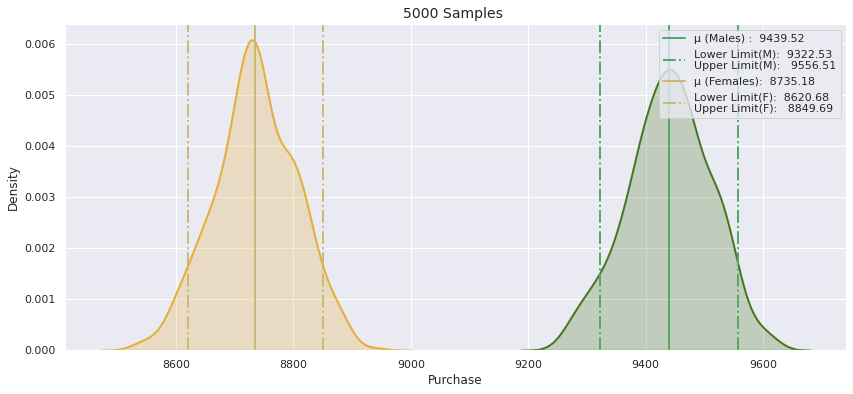

In [233]:
for size in [50,100,500,1000,5000]:
    m_means,f_means=[],[]
    ci=0.90
    z_critical = stats.norm.ppf(1-(1-ci)/2)
    for i in range(500):
        indices = np.random.choice(df.loc[df['Gender']=='M'].index,size=size ,replace=True)
        m_means.append(df.loc[indices,'Purchase'].mean())

        indices = np.random.choice(df.loc[df['Gender']=='F'].index,size=size ,replace=True)
        f_means.append(df.loc[indices,'Purchase'].mean())

    m_mean = np.mean(m_means)
    m_std = np.std(m_means)
    lower_limit_m = m_mean - (z_critical * m_std)
    upper_limit_m = m_mean + (z_critical * m_std)

    f_mean = np.mean(f_means)
    f_std = np.std(f_means)
    lower_limit_f = f_mean - (z_critical * f_std)
    upper_limit_f = f_mean + (z_critical * f_std)

    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")

    sns.kdeplot(data=m_means,color="#467821",fill=True,linewidth=2)
    sns.kdeplot(data=f_means,color='#e5ae38',fill=True,linewidth=2)

    label_mean1=("μ (Males) :  {:.2f}".format(m_mean))
    label_ult1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_m,upper_limit_m))
    label_mean2=("μ (Females):  {:.2f}".format(f_mean))
    label_ult2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit_f,upper_limit_f))

    plt.title(str(size)+" Samples ",fontsize=14)
    plt.xlabel('Purchase')
    plt.axvline(m_mean, color = 'g', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit_m, color = 'g', linestyle = 'dashdot', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit_m, color = 'g', linestyle = 'dashdot', linewidth = 2)
    plt.axvline(f_mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit_f, color = 'y', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit_f, color = 'y', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()

From the above plotted its mostly self explanatory regarding the plot CI limits and sampling means , what we can intrepret here is as the sample size increase the sampling distribution starts moving against each other and it starts showing both the distributions of Male and Female are significant from the 500 sample range

95% CI

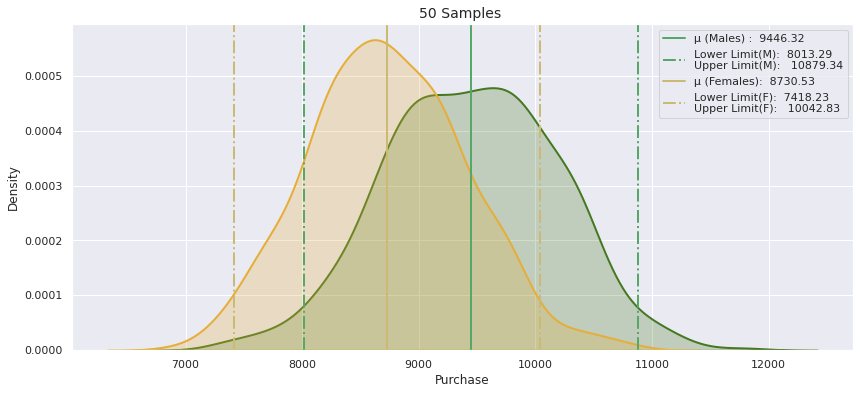

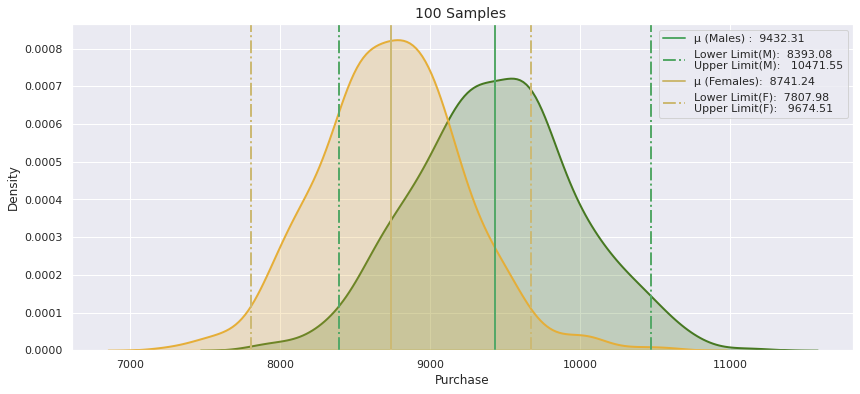

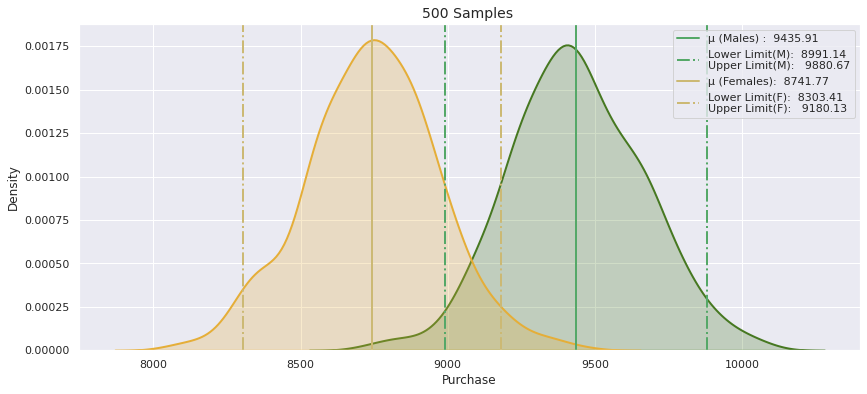

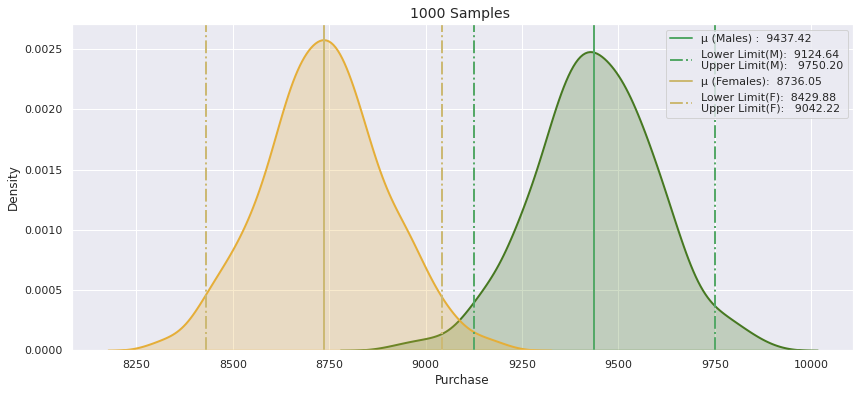

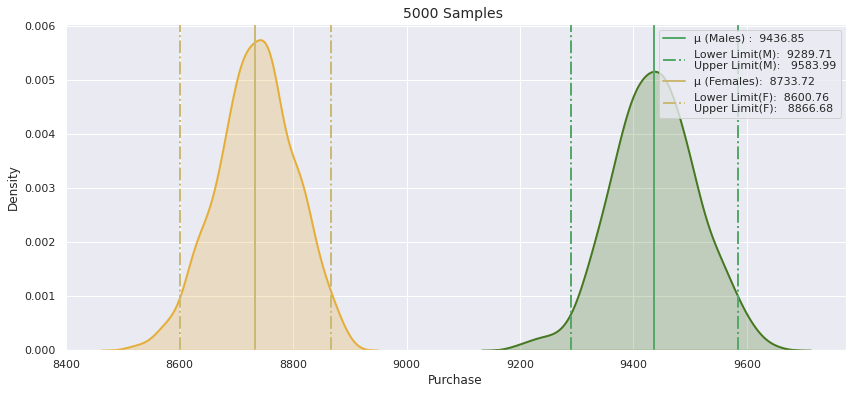

In [387]:
for size in [50,100,500,1000,5000]:
    m_means,f_means=[],[]
    ci=0.95
    z_critical = stats.norm.ppf(1-(1-ci)/2)
    for i in range(500):
        indices = np.random.choice(df.loc[df['Gender']=='M'].index,size=size ,replace=True)
        m_means.append(df.loc[indices,'Purchase'].mean())

        indices = np.random.choice(df.loc[df['Gender']=='F'].index,size=size ,replace=True)
        f_means.append(df.loc[indices,'Purchase'].mean())

    m_mean = np.mean(m_means)
    m_std = np.std(m_means)
    lower_limit_m = m_mean - (z_critical * m_std)
    upper_limit_m = m_mean + (z_critical * m_std)

    f_mean = np.mean(f_means)
    f_std = np.std(f_means)
    lower_limit_f = f_mean - (z_critical * f_std)
    upper_limit_f = f_mean + (z_critical * f_std)

    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")

    sns.kdeplot(data=m_means,color="#467821",fill=True,linewidth=2)
    sns.kdeplot(data=f_means,color='#e5ae38',fill=True,linewidth=2)

    label_mean1=("μ (Males) :  {:.2f}".format(m_mean))
    label_ult1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_m,upper_limit_m))
    label_mean2=("μ (Females):  {:.2f}".format(f_mean))
    label_ult2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit_f,upper_limit_f))

    plt.title(str(size)+" Samples ",fontsize=14)
    plt.xlabel('Purchase')
    plt.axvline(m_mean, color = 'g', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit_m, color = 'g', linestyle = 'dashdot', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit_m, color = 'g', linestyle = 'dashdot', linewidth = 2)
    plt.axvline(f_mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit_f, color = 'y', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit_f, color = 'y', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()

From the above plotted its mostly self explanatory regarding the plot CI limits and sampling means , what we can intrepret here is as the sample size increase the sampling distribution starts moving against each other and it starts showing both the distributions of Male and Female are significant from the 1000 sample range at 95% confidence interval

99% CI

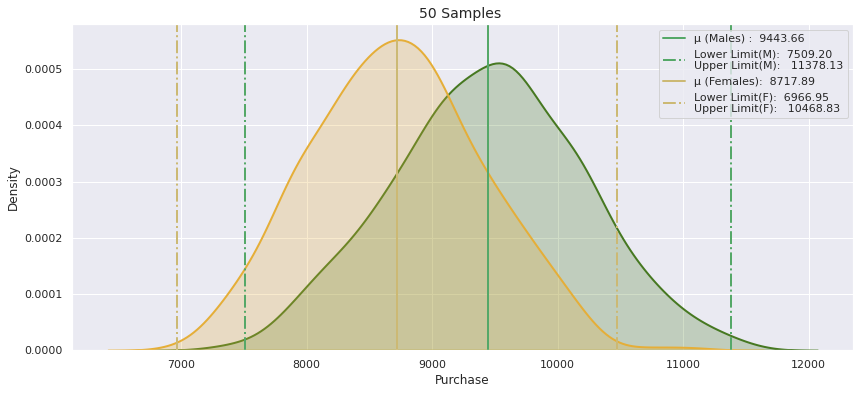

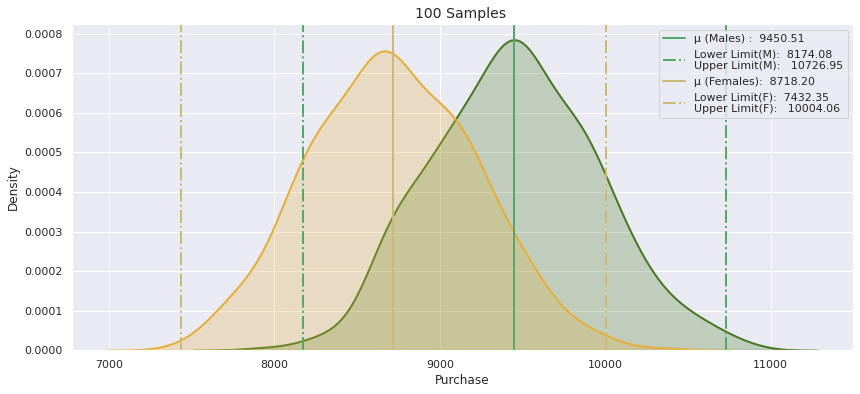

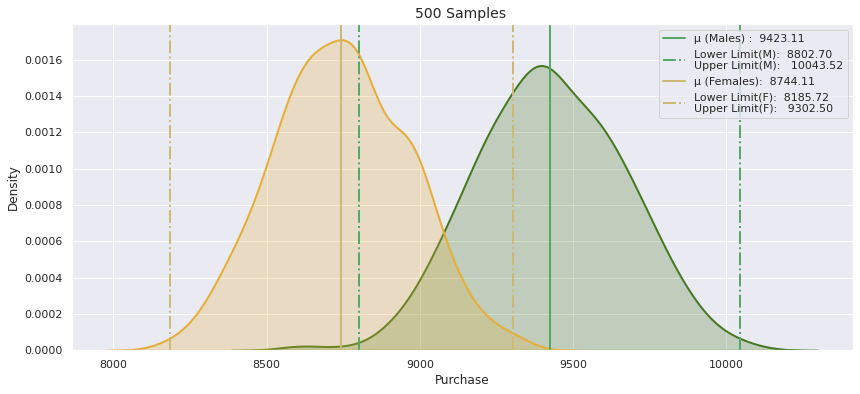

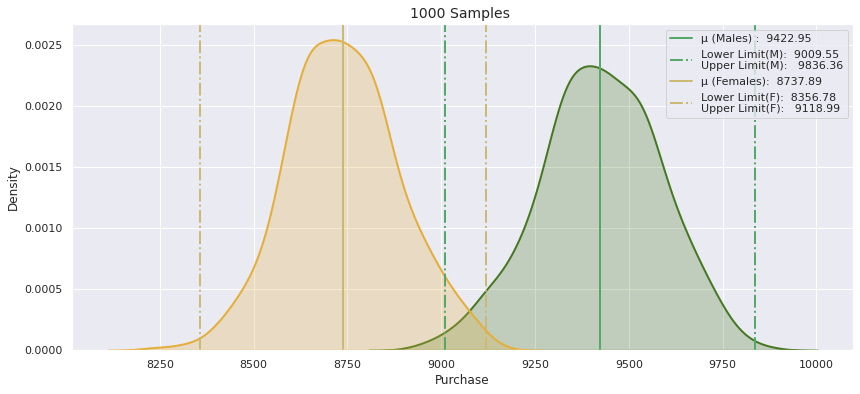

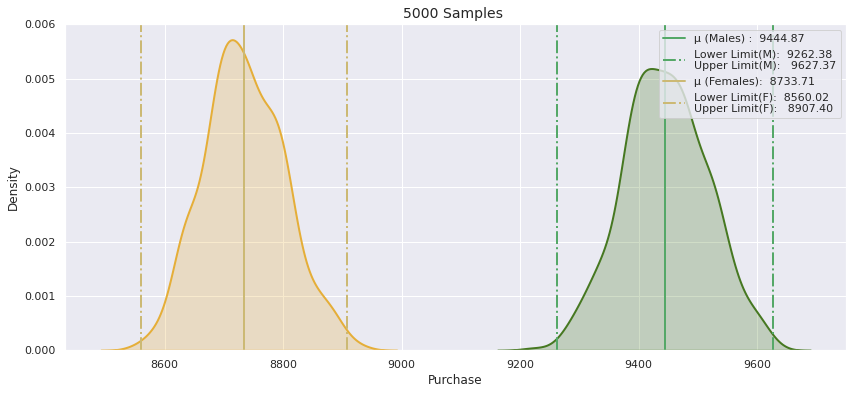

In [388]:
for size in [50,100,500,1000,5000]:
    m_means,f_means=[],[]
    ci=0.99
    z_critical = stats.norm.ppf(1-(1-ci)/2)
    for i in range(500):
        indices = np.random.choice(df.loc[df['Gender']=='M'].index,size=size ,replace=True)
        m_means.append(df.loc[indices,'Purchase'].mean())

        indices = np.random.choice(df.loc[df['Gender']=='F'].index,size=size ,replace=True)
        f_means.append(df.loc[indices,'Purchase'].mean())

    m_mean = np.mean(m_means)
    m_std = np.std(m_means)
    lower_limit_m = m_mean - (z_critical * m_std)
    upper_limit_m = m_mean + (z_critical * m_std)

    f_mean = np.mean(f_means)
    f_std = np.std(f_means)
    lower_limit_f = f_mean - (z_critical * f_std)
    upper_limit_f = f_mean + (z_critical * f_std)

    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")

    sns.kdeplot(data=m_means,color="#467821",fill=True,linewidth=2)
    sns.kdeplot(data=f_means,color='#e5ae38',fill=True,linewidth=2)

    label_mean1=("μ (Males) :  {:.2f}".format(m_mean))
    label_ult1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_m,upper_limit_m))
    label_mean2=("μ (Females):  {:.2f}".format(f_mean))
    label_ult2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit_f,upper_limit_f))

    plt.title(str(size)+" Samples ",fontsize=14)
    plt.xlabel('Purchase')
    plt.axvline(m_mean, color = 'g', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit_m, color = 'g', linestyle = 'dashdot', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit_m, color = 'g', linestyle = 'dashdot', linewidth = 2)
    plt.axvline(f_mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit_f, color = 'y', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit_f, color = 'y', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()

From the above plotted its mostly self explanatory regarding the plot CI limits and sampling means , what we can intrepret here is as the sample size increase the sampling distribution starts moving against each other and it starts showing both the distributions of Male and Female are significant from the 5000 sample range at 99% confidence interval 

Overall we can say that Male spend significantly higher than Female \
The sample size increases the confidence also increases

#### Confidence Interval based on Maritial Status

90% CI

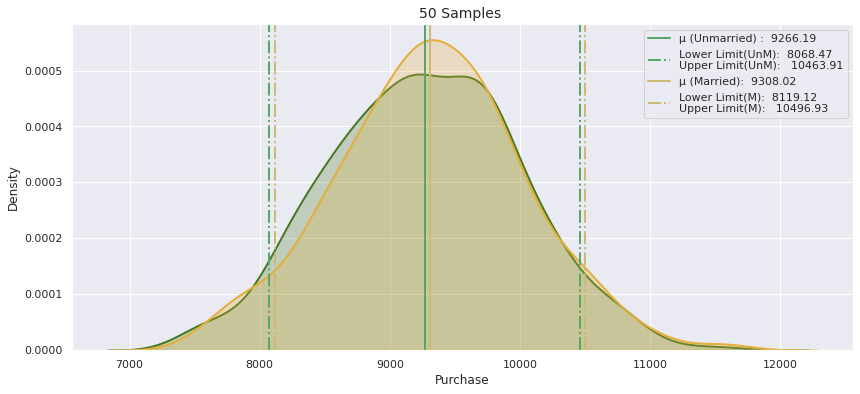

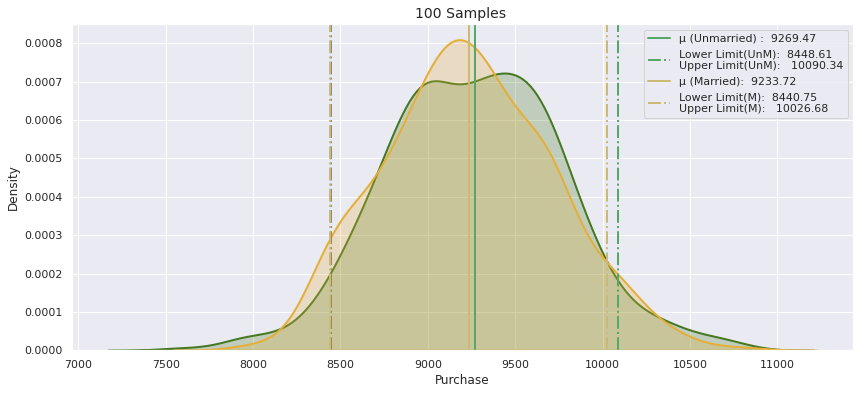

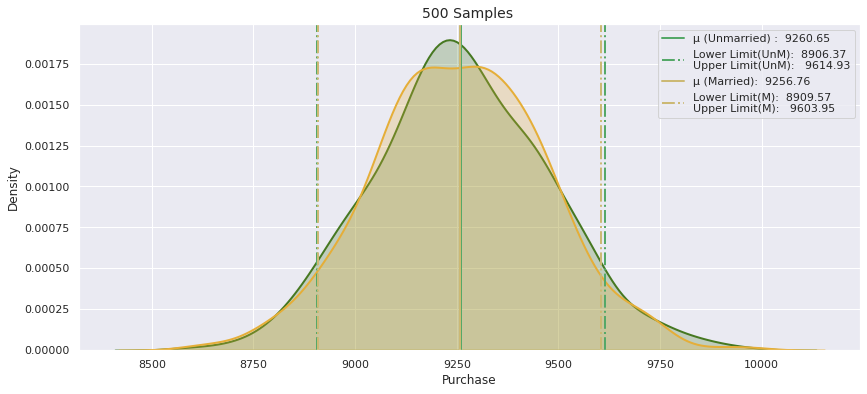

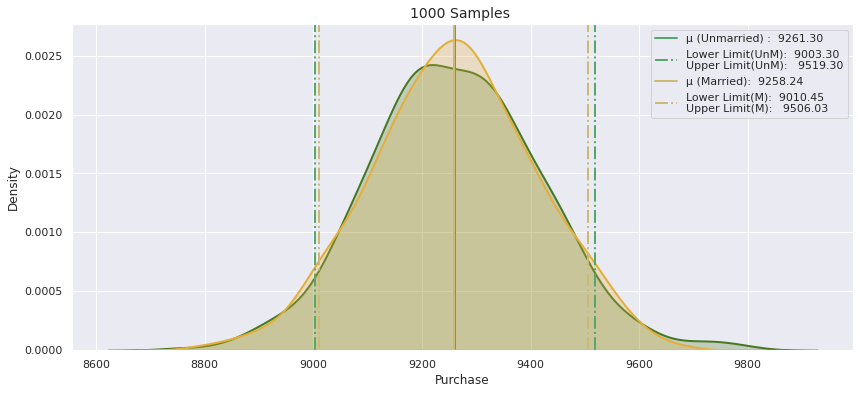

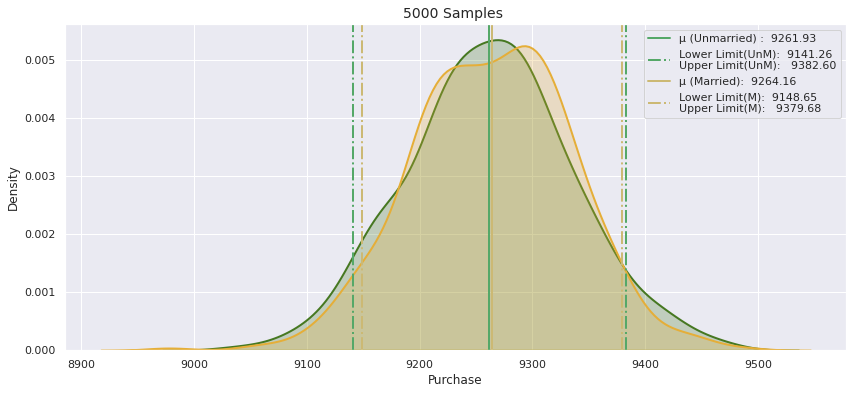

In [235]:
for size in [50,100,500,1000,5000]:
    m_means,f_means=[],[]
    ci=0.90
    z_critical = stats.norm.ppf(1-(1-ci)/2)
    for i in range(500):
        indices = np.random.choice(df.loc[df['Marital_Status']=='0'].index,size=size ,replace=True)
        m_means.append(df.loc[indices,'Purchase'].mean())

        indices = np.random.choice(df.loc[df['Marital_Status']=='1'].index,size=size ,replace=True)
        f_means.append(df.loc[indices,'Purchase'].mean())

    m_mean = np.mean(m_means)
    m_std = np.std(m_means)
    lower_limit_m = m_mean - (z_critical * m_std)
    upper_limit_m = m_mean + (z_critical * m_std)

    f_mean = np.mean(f_means)
    f_std = np.std(f_means)
    lower_limit_f = f_mean - (z_critical * f_std)
    upper_limit_f = f_mean + (z_critical * f_std)

    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")

    sns.kdeplot(data=m_means,color="#467821",fill=True,linewidth=2)
    sns.kdeplot(data=f_means,color='#e5ae38',fill=True,linewidth=2)

    label_mean1=("μ (Unmarried) :  {:.2f}".format(m_mean))
    label_ult1=("Lower Limit(UnM):  {:.2f}\nUpper Limit(UnM):   {:.2f}".format(lower_limit_m,upper_limit_m))
    label_mean2=("μ (Married):  {:.2f}".format(f_mean))
    label_ult2=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_f,upper_limit_f))

    plt.title(str(size)+" Samples ",fontsize=14)
    plt.xlabel('Purchase')
    plt.axvline(m_mean, color = 'g', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit_m, color = 'g', linestyle = 'dashdot', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit_m, color = 'g', linestyle = 'dashdot', linewidth = 2)
    plt.axvline(f_mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit_f, color = 'y', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit_f, color = 'y', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()

From the above plotted its mostly self explanatory regarding the plot CI limits and sampling means , what we can interpret here even as the sample size increase the sampling distribution doesnt change  between Unmarried and Married at 90% confidence interval 

95% CI

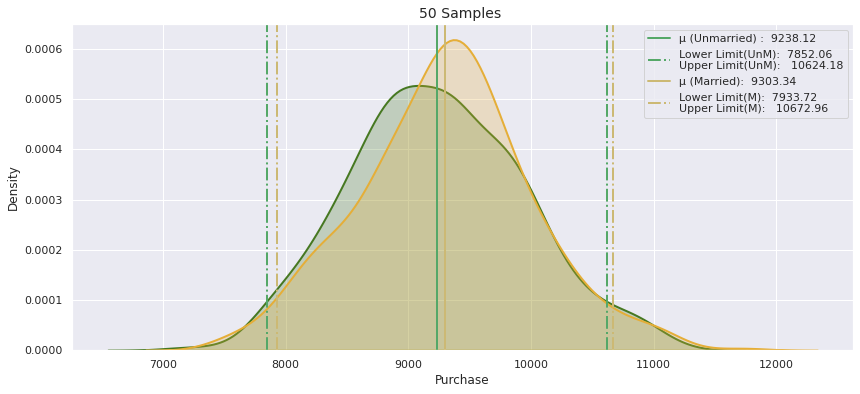

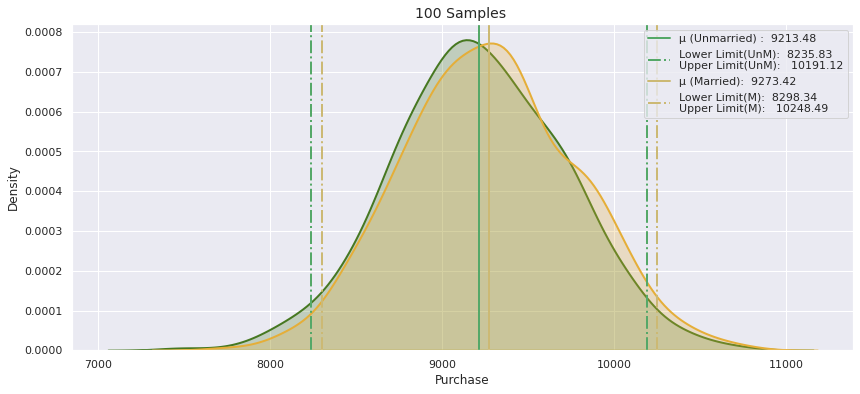

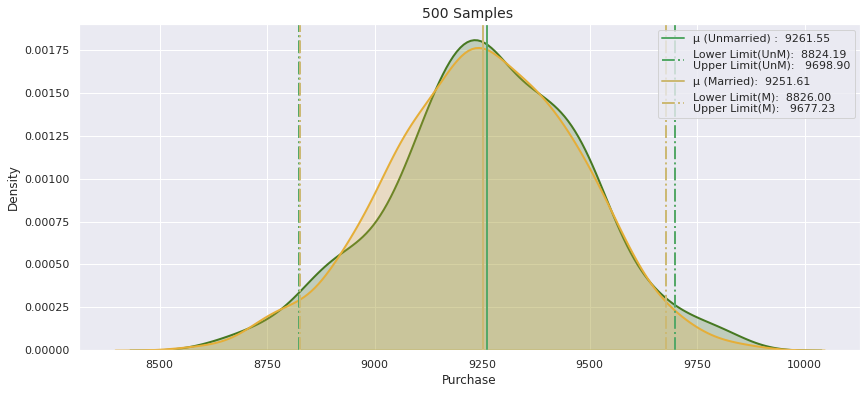

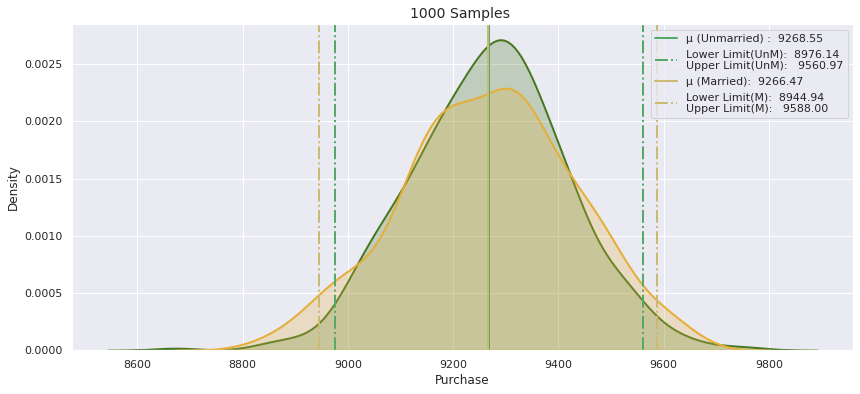

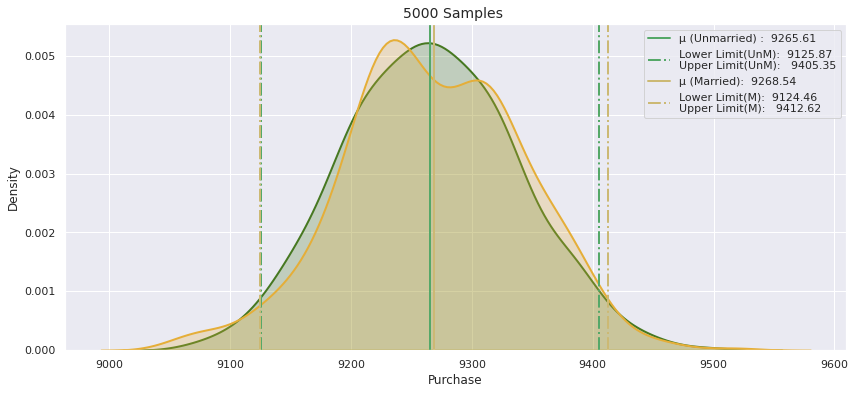

In [389]:
for size in [50,100,500,1000,5000]:
    m_means,f_means=[],[]
    ci=0.95
    z_critical = stats.norm.ppf(1-(1-ci)/2)
    for i in range(500):
        indices = np.random.choice(df.loc[df['Marital_Status']=='0'].index,size=size ,replace=True)
        m_means.append(df.loc[indices,'Purchase'].mean())

        indices = np.random.choice(df.loc[df['Marital_Status']=='1'].index,size=size ,replace=True)
        f_means.append(df.loc[indices,'Purchase'].mean())

    m_mean = np.mean(m_means)
    m_std = np.std(m_means)
    lower_limit_m = m_mean - (z_critical * m_std)
    upper_limit_m = m_mean + (z_critical * m_std)

    f_mean = np.mean(f_means)
    f_std = np.std(f_means)
    lower_limit_f = f_mean - (z_critical * f_std)
    upper_limit_f = f_mean + (z_critical * f_std)

    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")

    sns.kdeplot(data=m_means,color="#467821",fill=True,linewidth=2)
    sns.kdeplot(data=f_means,color='#e5ae38',fill=True,linewidth=2)

    label_mean1=("μ (Unmarried) :  {:.2f}".format(m_mean))
    label_ult1=("Lower Limit(UnM):  {:.2f}\nUpper Limit(UnM):   {:.2f}".format(lower_limit_m,upper_limit_m))
    label_mean2=("μ (Married):  {:.2f}".format(f_mean))
    label_ult2=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_f,upper_limit_f))

    plt.title(str(size)+" Samples ",fontsize=14)
    plt.xlabel('Purchase')
    plt.axvline(m_mean, color = 'g', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit_m, color = 'g', linestyle = 'dashdot', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit_m, color = 'g', linestyle = 'dashdot', linewidth = 2)
    plt.axvline(f_mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit_f, color = 'y', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit_f, color = 'y', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()

From the above plotted its mostly self explanatory regarding the plot CI limits and sampling means , what we can interpret here even as the sample size increase the sampling distribution doesnt change  between Unmarried and Married at 95% confidence interval 

99% CI

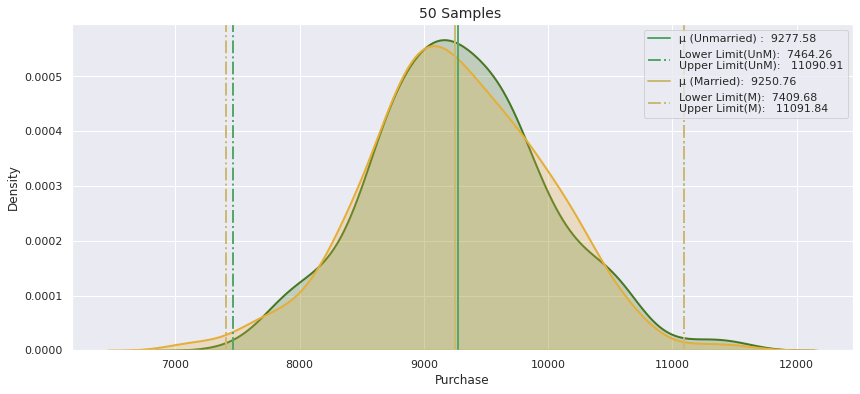

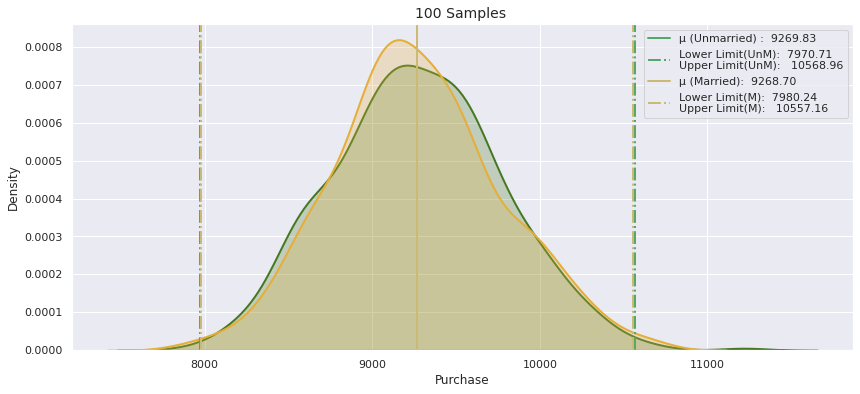

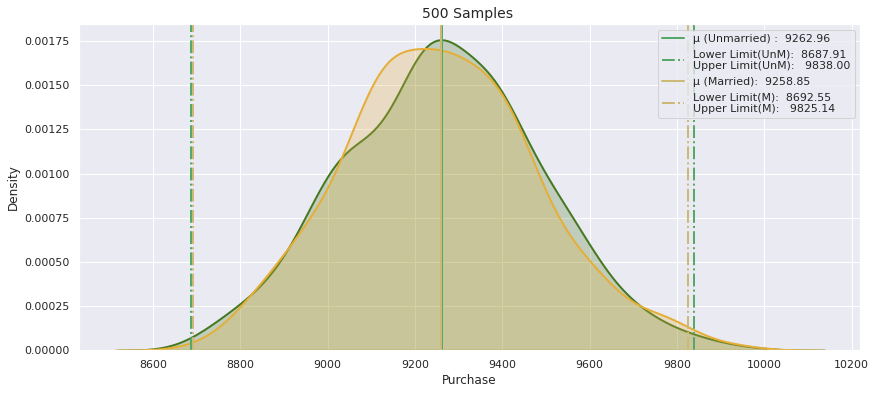

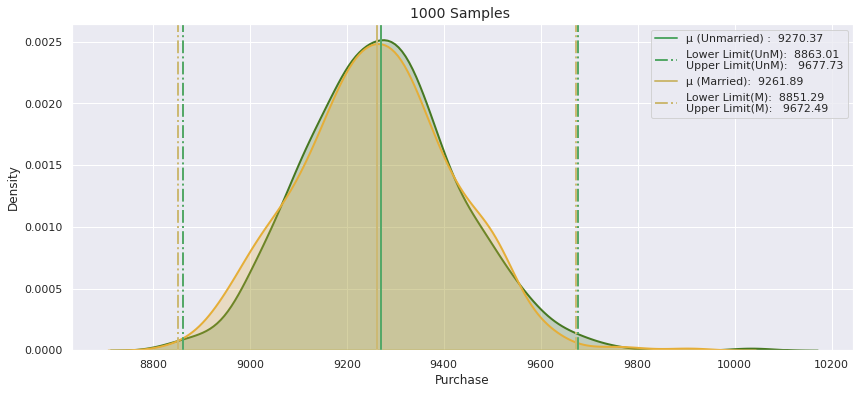

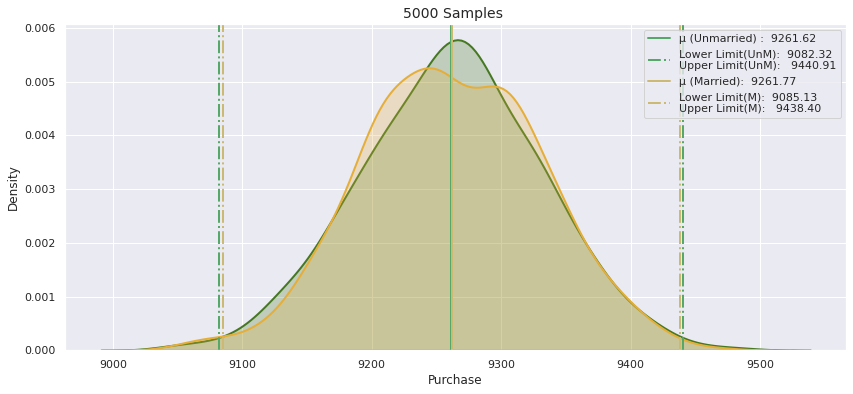

In [390]:
for size in [50,100,500,1000,5000]:
    m_means,f_means=[],[]
    ci=0.99
    z_critical = stats.norm.ppf(1-(1-ci)/2)
    for i in range(500):
        indices = np.random.choice(df.loc[df['Marital_Status']=='0'].index,size=size ,replace=True)
        m_means.append(df.loc[indices,'Purchase'].mean())

        indices = np.random.choice(df.loc[df['Marital_Status']=='1'].index,size=size ,replace=True)
        f_means.append(df.loc[indices,'Purchase'].mean())

    m_mean = np.mean(m_means)
    m_std = np.std(m_means)
    lower_limit_m = m_mean - (z_critical * m_std)
    upper_limit_m = m_mean + (z_critical * m_std)

    f_mean = np.mean(f_means)
    f_std = np.std(f_means)
    lower_limit_f = f_mean - (z_critical * f_std)
    upper_limit_f = f_mean + (z_critical * f_std)

    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")

    sns.kdeplot(data=m_means,color="#467821",fill=True,linewidth=2)
    sns.kdeplot(data=f_means,color='#e5ae38',fill=True,linewidth=2)

    label_mean1=("μ (Unmarried) :  {:.2f}".format(m_mean))
    label_ult1=("Lower Limit(UnM):  {:.2f}\nUpper Limit(UnM):   {:.2f}".format(lower_limit_m,upper_limit_m))
    label_mean2=("μ (Married):  {:.2f}".format(f_mean))
    label_ult2=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_f,upper_limit_f))

    plt.title(str(size)+" Samples ",fontsize=14)
    plt.xlabel('Purchase')
    plt.axvline(m_mean, color = 'g', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit_m, color = 'g', linestyle = 'dashdot', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit_m, color = 'g', linestyle = 'dashdot', linewidth = 2)
    plt.axvline(f_mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit_f, color = 'y', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit_f, color = 'y', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()

From the above plotted its mostly self explanatory regarding the plot CI limits and sampling means , what we can interpret here even as the sample size increase the sampling distribution doesnt change  between Unmarried and Married at 99% confidence interval 

### Confidence Interval analysis on Age groups

90% CI

In [236]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

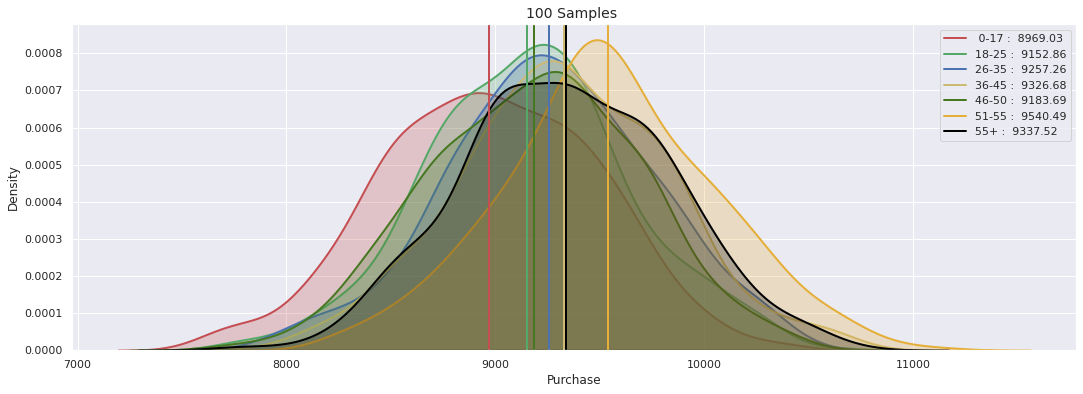

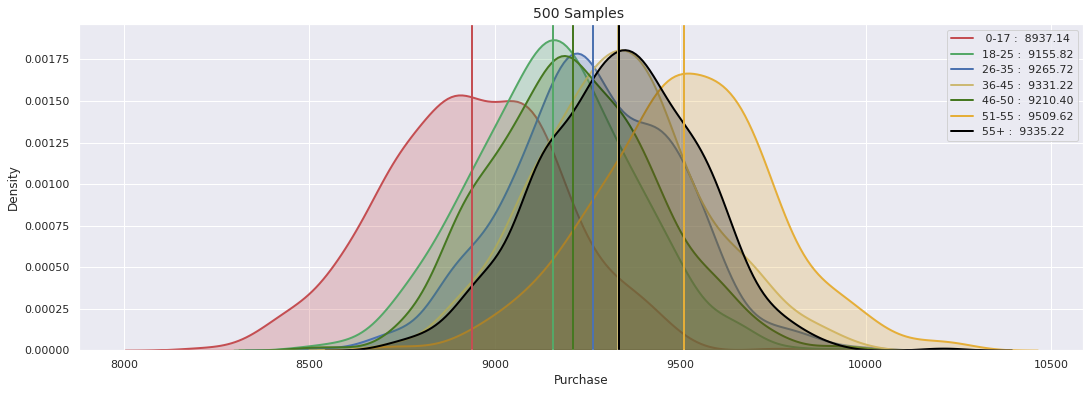

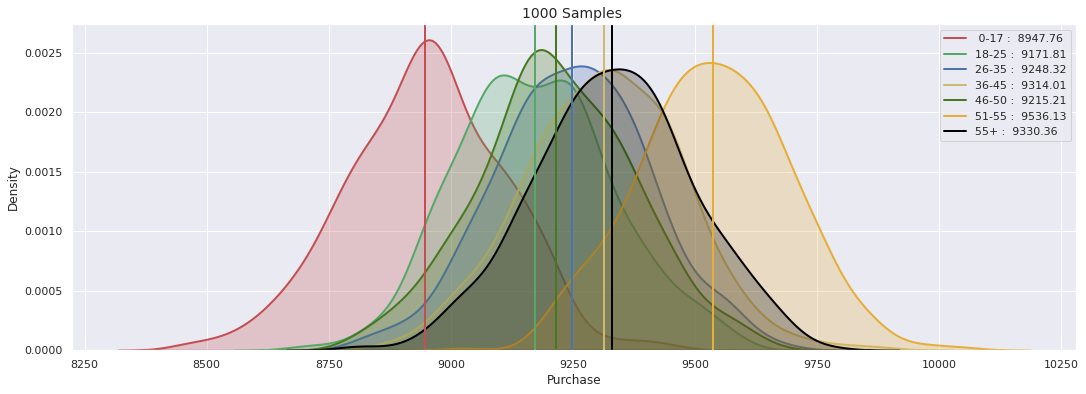

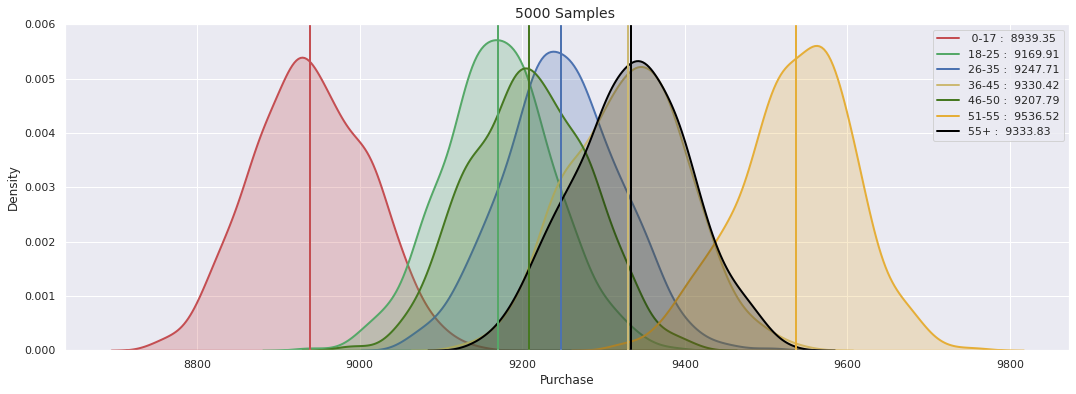

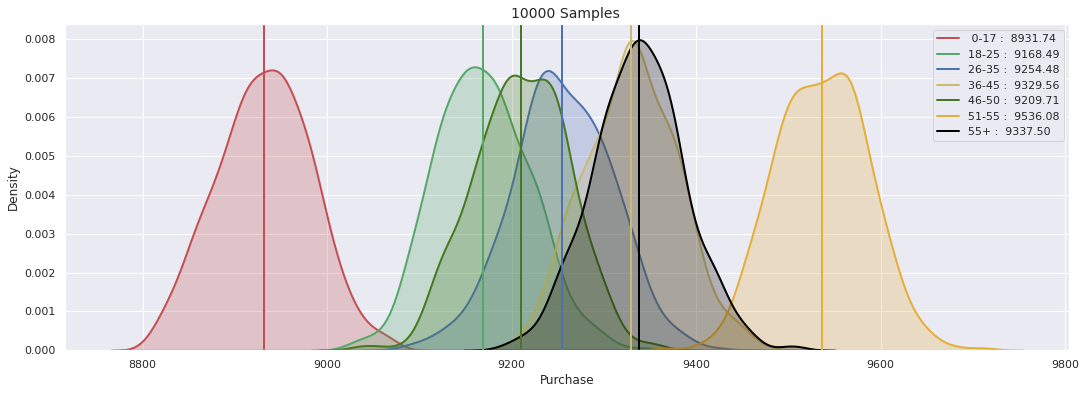

In [391]:
for size in [100,500,1000,5000,10000]:
    a_means,b_means,c_means,d_means,e_means,f_means,g_means=[],[],[],[],[],[],[]
    ci=0.90
    z_critical = stats.norm.ppf(1-(1-ci)/2)
    for i in range(500):
        indices = np.random.choice(df.loc[df['Age']=='0-17'].index,size=size ,replace=True)
        a_means.append(df.loc[indices,'Purchase'].mean())

        indices = np.random.choice(df.loc[df['Age']=='18-25'].index,size=size ,replace=True)
        b_means.append(df.loc[indices,'Purchase'].mean())
        
        indices = np.random.choice(df.loc[df['Age']=='26-35'].index,size=size ,replace=True)
        c_means.append(df.loc[indices,'Purchase'].mean())

        indices = np.random.choice(df.loc[df['Age']=='36-45'].index,size=size ,replace=True)
        d_means.append(df.loc[indices,'Purchase'].mean())
        
        indices = np.random.choice(df.loc[df['Age']=='46-50'].index,size=size ,replace=True)
        e_means.append(df.loc[indices,'Purchase'].mean())

        indices = np.random.choice(df.loc[df['Age']=='51-55'].index,size=size ,replace=True)
        f_means.append(df.loc[indices,'Purchase'].mean())
        
        indices = np.random.choice(df.loc[df['Age']=='55+'].index,size=size ,replace=True)
        g_means.append(df.loc[indices,'Purchase'].mean())

    
    a_mean = np.mean(a_means)
    a_std = np.std(a_means)
    lower_limit_a = a_mean - (z_critical * a_std)
    upper_limit_a = a_mean + (z_critical * a_std)

    b_mean = np.mean(b_means)
    b_std = np.std(b_means)
    lower_limit_b = b_mean - (z_critical * b_std)
    upper_limit_b = b_mean + (z_critical * b_std)
    
    c_mean = np.mean(c_means)
    c_std = np.std(c_means)
    lower_limit_c = c_mean - (z_critical * c_std)
    upper_limit_c = c_mean + (z_critical * c_std)
    
    d_mean = np.mean(d_means)
    d_std = np.std(d_means)
    lower_limit_d = d_mean - (z_critical * d_std)
    upper_limit_d = d_mean + (z_critical * d_std)
    
    e_mean = np.mean(e_means)
    e_std = np.std(e_means)
    lower_limit_e = e_mean - (z_critical * e_std)
    upper_limit_e = e_mean + (z_critical * e_std)

    f_mean = np.mean(f_means)
    f_std = np.std(f_means)
    lower_limit_f = f_mean - (z_critical * f_std)
    upper_limit_f = f_mean + (z_critical * f_std)

    g_mean = np.mean(g_means)
    g_std = np.std(g_means)
    lower_limit_g = g_mean - (z_critical * g_std)
    upper_limit_g = g_mean + (z_critical * g_std)

    fig, ax = plt.subplots(figsize=(18,6))
    sns.set_style("darkgrid")

    sns.kdeplot(data=a_means,color="r",fill=True,linewidth=2)
    sns.kdeplot(data=b_means,color='g',fill=True,linewidth=2)
    sns.kdeplot(data=c_means,color='b',fill=True,linewidth=2)
    sns.kdeplot(data=d_means,color='y',fill=True,linewidth=2)
    sns.kdeplot(data=e_means,color='#467821',fill=True,linewidth=2)
    sns.kdeplot(data=f_means,color='#e5ae38',fill=True,linewidth=2)
    sns.kdeplot(data=g_means,color='#000000',fill=True,linewidth=2)

    label_mean1=(" 0-17 :  {:.2f}".format(a_mean))
    label_mean2=("18-25 :  {:.2f}".format(b_mean))
    label_mean3=("26-35 :  {:.2f}".format(c_mean))
    label_mean4=("36-45 :  {:.2f}".format(d_mean))
    label_mean5=("46-50 :  {:.2f}".format(e_mean))
    label_mean6=("51-55 :  {:.2f}".format(f_mean))
    label_mean7=("55+ :  {:.2f}".format(g_mean))

    plt.title(str(size)+" Samples ",fontsize=14)
    plt.xlabel('Purchase')
    plt.axvline(a_mean, color = 'r', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(b_mean, color = 'g', linestyle = 'solid', linewidth = 2,label=label_mean2)
    plt.axvline(c_mean, color = 'b', linestyle = 'solid', linewidth = 2,label=label_mean3)
    plt.axvline(d_mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean4)
    plt.axvline(e_mean, color = '#467821', linestyle = 'solid', linewidth = 2,label=label_mean5)
    plt.axvline(f_mean, color = '#e5ae38', linestyle = 'solid', linewidth = 2,label=label_mean6)
    plt.axvline(g_mean, color = '#000000', linestyle = 'solid', linewidth = 2,label=label_mean7)

    plt.legend(loc='upper right')

    plt.show()

95% CI

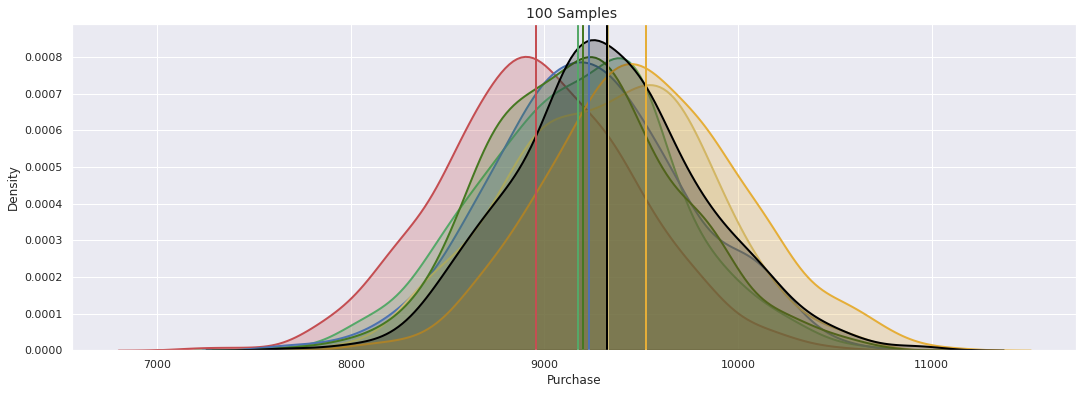

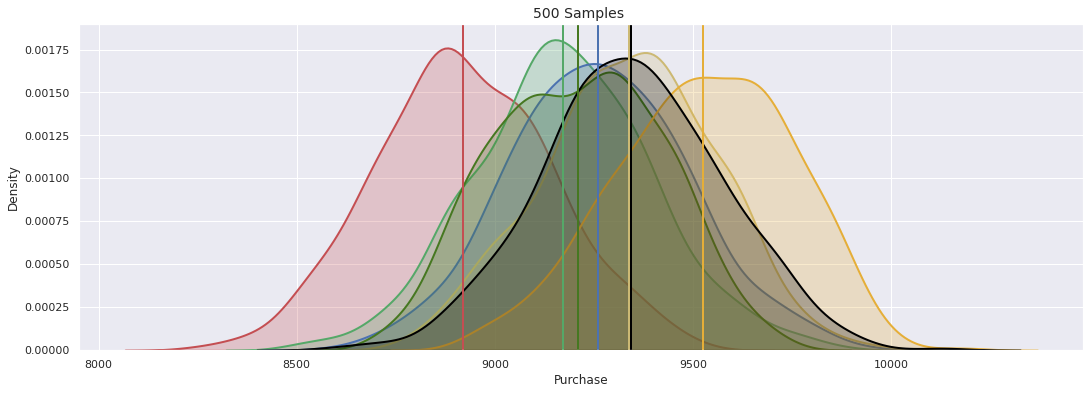

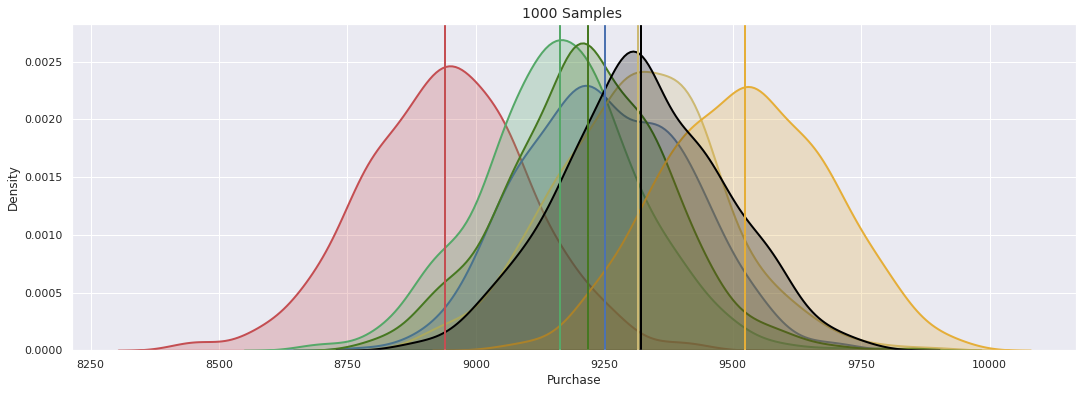

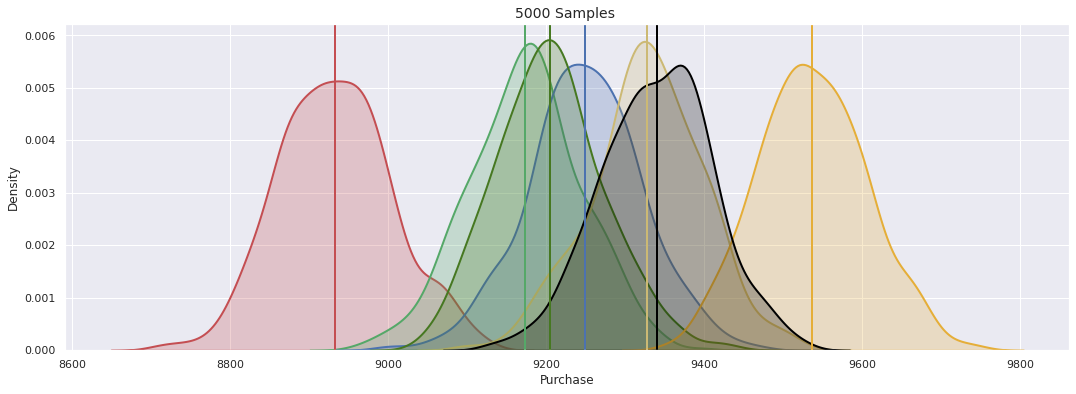

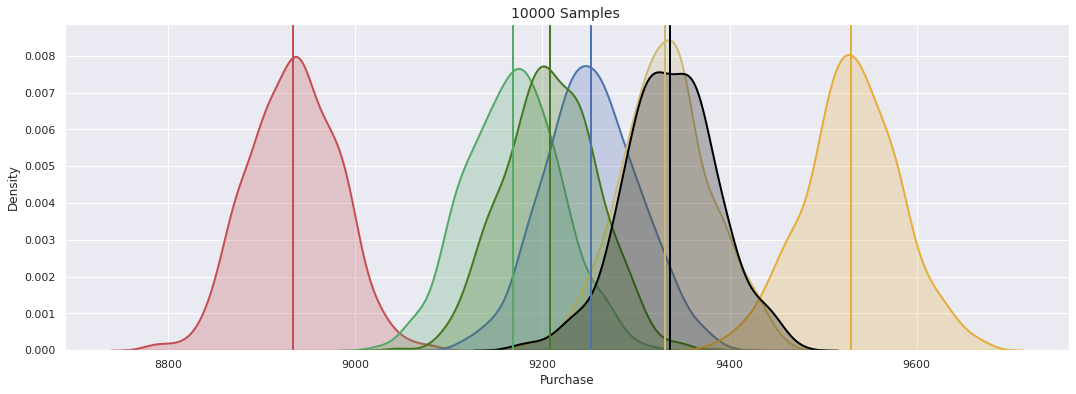

In [394]:
for size in [100,500,1000,5000,10000]:
    a_means,b_means,c_means,d_means,e_means,f_means,g_means=[],[],[],[],[],[],[]
    ci=0.95
    z_critical = stats.norm.ppf(1-(1-ci)/2)
    for i in range(500):
        indices = np.random.choice(df.loc[df['Age']=='0-17'].index,size=size ,replace=True)
        a_means.append(df.loc[indices,'Purchase'].mean())

        indices = np.random.choice(df.loc[df['Age']=='18-25'].index,size=size ,replace=True)
        b_means.append(df.loc[indices,'Purchase'].mean())
        
        indices = np.random.choice(df.loc[df['Age']=='26-35'].index,size=size ,replace=True)
        c_means.append(df.loc[indices,'Purchase'].mean())

        indices = np.random.choice(df.loc[df['Age']=='36-45'].index,size=size ,replace=True)
        d_means.append(df.loc[indices,'Purchase'].mean())
        
        indices = np.random.choice(df.loc[df['Age']=='46-50'].index,size=size ,replace=True)
        e_means.append(df.loc[indices,'Purchase'].mean())

        indices = np.random.choice(df.loc[df['Age']=='51-55'].index,size=size ,replace=True)
        f_means.append(df.loc[indices,'Purchase'].mean())
        
        indices = np.random.choice(df.loc[df['Age']=='55+'].index,size=size ,replace=True)
        g_means.append(df.loc[indices,'Purchase'].mean())

    
    a_mean = np.mean(a_means)
    a_std = np.std(a_means)
    lower_limit_a = a_mean - (z_critical * a_std)
    upper_limit_a = a_mean + (z_critical * a_std)

    b_mean = np.mean(b_means)
    b_std = np.std(b_means)
    lower_limit_b = b_mean - (z_critical * b_std)
    upper_limit_b = b_mean + (z_critical * b_std)
    
    c_mean = np.mean(c_means)
    c_std = np.std(c_means)
    lower_limit_c = c_mean - (z_critical * c_std)
    upper_limit_c = c_mean + (z_critical * c_std)
    
    d_mean = np.mean(d_means)
    d_std = np.std(d_means)
    lower_limit_d = d_mean - (z_critical * d_std)
    upper_limit_d = d_mean + (z_critical * d_std)
    
    e_mean = np.mean(e_means)
    e_std = np.std(e_means)
    lower_limit_e = e_mean - (z_critical * e_std)
    upper_limit_e = e_mean + (z_critical * e_std)

    f_mean = np.mean(f_means)
    f_std = np.std(f_means)
    lower_limit_f = f_mean - (z_critical * f_std)
    upper_limit_f = f_mean + (z_critical * f_std)

    g_mean = np.mean(g_means)
    g_std = np.std(g_means)
    lower_limit_g = g_mean - (z_critical * g_std)
    upper_limit_g = g_mean + (z_critical * g_std)

    fig, ax = plt.subplots(figsize=(18,6))
    sns.set_style("darkgrid")

    sns.kdeplot(data=a_means,color="r",fill=True,linewidth=2)
    sns.kdeplot(data=b_means,color='g',fill=True,linewidth=2)
    sns.kdeplot(data=c_means,color='b',fill=True,linewidth=2)
    sns.kdeplot(data=d_means,color='y',fill=True,linewidth=2)
    sns.kdeplot(data=e_means,color='#467821',fill=True,linewidth=2)
    sns.kdeplot(data=f_means,color='#e5ae38',fill=True,linewidth=2)
    sns.kdeplot(data=g_means,color='#000000',fill=True,linewidth=2)

    label_mean1=(" 0-17 :  {:.2f}".format(a_mean))
    label_mean2=("18-25 :  {:.2f}".format(b_mean))
    label_mean3=("26-35 :  {:.2f}".format(c_mean))
    label_mean4=("36-45 :  {:.2f}".format(d_mean))
    label_mean5=("46-50 :  {:.2f}".format(e_mean))
    label_mean6=("51-55 :  {:.2f}".format(f_mean))
    label_mean7=("55+ :  {:.2f}".format(g_mean))

    plt.title(str(size)+" Samples ",fontsize=14)
    plt.xlabel('Purchase')
    plt.axvline(a_mean, color = 'r', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(b_mean, color = 'g', linestyle = 'solid', linewidth = 2,label=label_mean2)
    plt.axvline(c_mean, color = 'b', linestyle = 'solid', linewidth = 2,label=label_mean3)
    plt.axvline(d_mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean4)
    plt.axvline(e_mean, color = '#467821', linestyle = 'solid', linewidth = 2,label=label_mean5)
    plt.axvline(f_mean, color = '#e5ae38', linestyle = 'solid', linewidth = 2,label=label_mean6)
    plt.axvline(g_mean, color = '#000000', linestyle = 'solid', linewidth = 2,label=label_mean7)


    plt.show()

99% CI

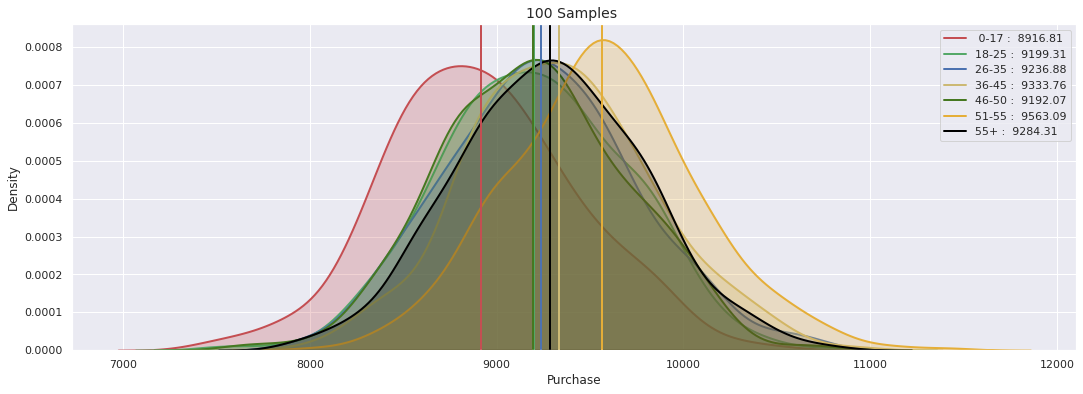

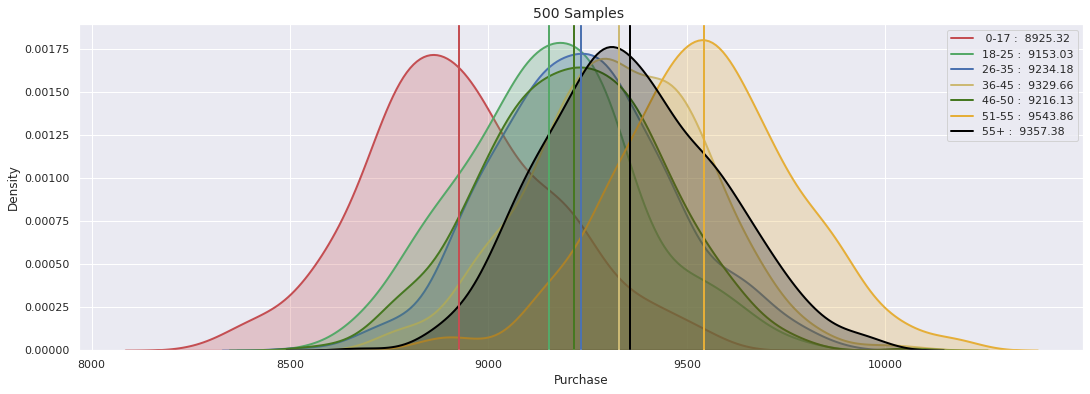

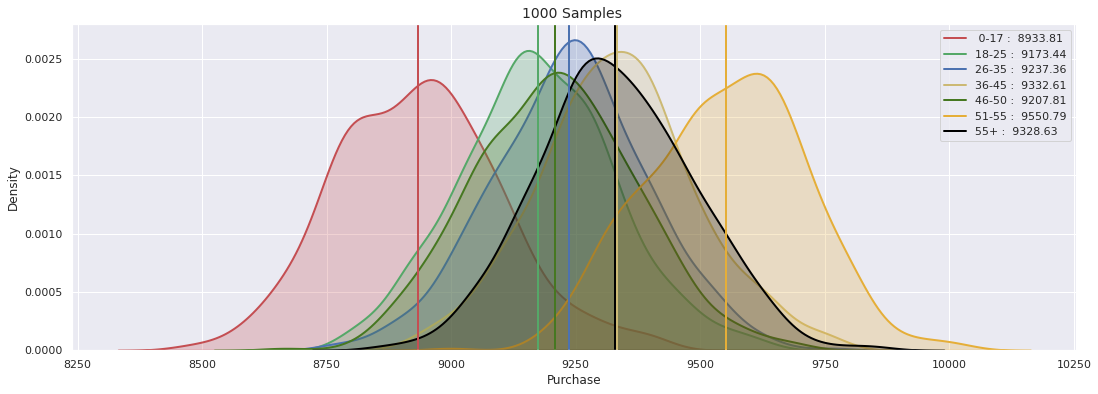

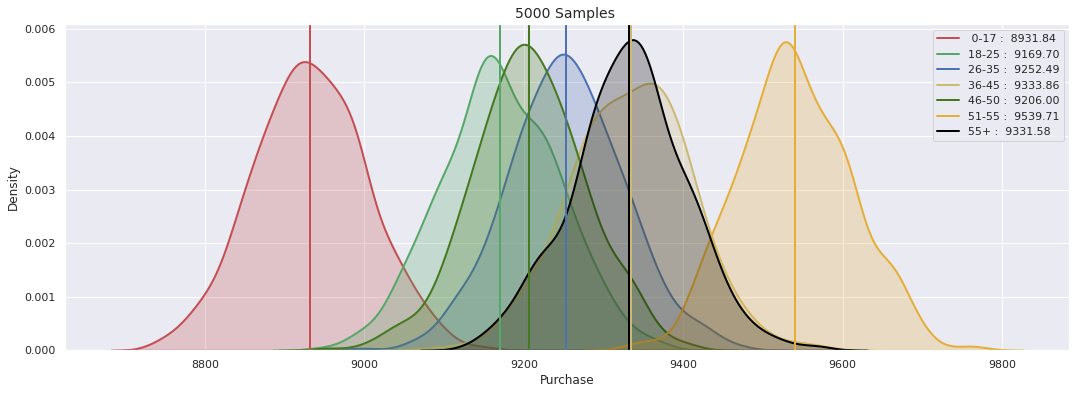

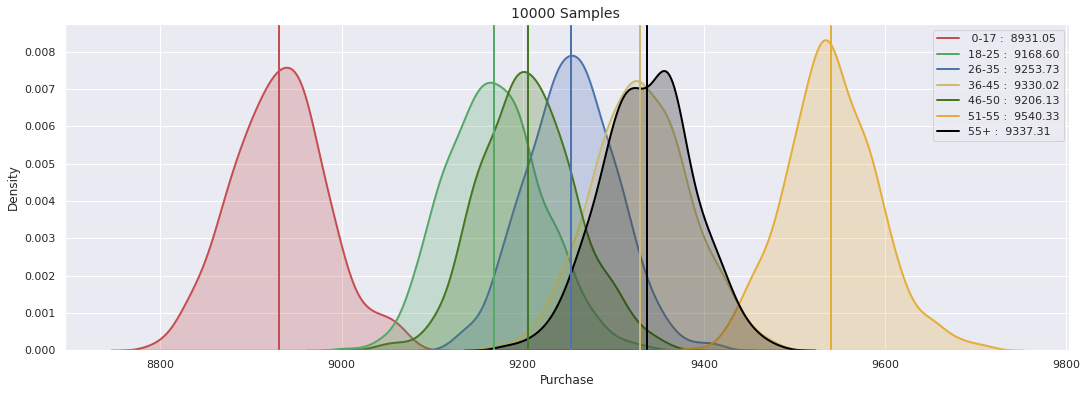

In [393]:
for size in [100,500,1000,5000,10000]:
    a_means,b_means,c_means,d_means,e_means,f_means,g_means=[],[],[],[],[],[],[]
    ci=0.99
    z_critical = stats.norm.ppf(1-(1-ci)/2)
    for i in range(500):
        indices = np.random.choice(df.loc[df['Age']=='0-17'].index,size=size ,replace=True)
        a_means.append(df.loc[indices,'Purchase'].mean())

        indices = np.random.choice(df.loc[df['Age']=='18-25'].index,size=size ,replace=True)
        b_means.append(df.loc[indices,'Purchase'].mean())
        
        indices = np.random.choice(df.loc[df['Age']=='26-35'].index,size=size ,replace=True)
        c_means.append(df.loc[indices,'Purchase'].mean())

        indices = np.random.choice(df.loc[df['Age']=='36-45'].index,size=size ,replace=True)
        d_means.append(df.loc[indices,'Purchase'].mean())
        
        indices = np.random.choice(df.loc[df['Age']=='46-50'].index,size=size ,replace=True)
        e_means.append(df.loc[indices,'Purchase'].mean())

        indices = np.random.choice(df.loc[df['Age']=='51-55'].index,size=size ,replace=True)
        f_means.append(df.loc[indices,'Purchase'].mean())
        
        indices = np.random.choice(df.loc[df['Age']=='55+'].index,size=size ,replace=True)
        g_means.append(df.loc[indices,'Purchase'].mean())

    
    a_mean = np.mean(a_means)
    a_std = np.std(a_means)
    lower_limit_a = a_mean - (z_critical * a_std)
    upper_limit_a = a_mean + (z_critical * a_std)

    b_mean = np.mean(b_means)
    b_std = np.std(b_means)
    lower_limit_b = b_mean - (z_critical * b_std)
    upper_limit_b = b_mean + (z_critical * b_std)
    
    c_mean = np.mean(c_means)
    c_std = np.std(c_means)
    lower_limit_c = c_mean - (z_critical * c_std)
    upper_limit_c = c_mean + (z_critical * c_std)
    
    d_mean = np.mean(d_means)
    d_std = np.std(d_means)
    lower_limit_d = d_mean - (z_critical * d_std)
    upper_limit_d = d_mean + (z_critical * d_std)
    
    e_mean = np.mean(e_means)
    e_std = np.std(e_means)
    lower_limit_e = e_mean - (z_critical * e_std)
    upper_limit_e = e_mean + (z_critical * e_std)

    f_mean = np.mean(f_means)
    f_std = np.std(f_means)
    lower_limit_f = f_mean - (z_critical * f_std)
    upper_limit_f = f_mean + (z_critical * f_std)

    g_mean = np.mean(g_means)
    g_std = np.std(g_means)
    lower_limit_g = g_mean - (z_critical * g_std)
    upper_limit_g = g_mean + (z_critical * g_std)

    fig, ax = plt.subplots(figsize=(18,6))
    sns.set_style("darkgrid")

    sns.kdeplot(data=a_means,color="r",fill=True,linewidth=2)
    sns.kdeplot(data=b_means,color='g',fill=True,linewidth=2)
    sns.kdeplot(data=c_means,color='b',fill=True,linewidth=2)
    sns.kdeplot(data=d_means,color='y',fill=True,linewidth=2)
    sns.kdeplot(data=e_means,color='#467821',fill=True,linewidth=2)
    sns.kdeplot(data=f_means,color='#e5ae38',fill=True,linewidth=2)
    sns.kdeplot(data=g_means,color='#000000',fill=True,linewidth=2)

    label_mean1=(" 0-17 :  {:.2f}".format(a_mean))
    label_mean2=("18-25 :  {:.2f}".format(b_mean))
    label_mean3=("26-35 :  {:.2f}".format(c_mean))
    label_mean4=("36-45 :  {:.2f}".format(d_mean))
    label_mean5=("46-50 :  {:.2f}".format(e_mean))
    label_mean6=("51-55 :  {:.2f}".format(f_mean))
    label_mean7=("55+ :  {:.2f}".format(g_mean))

    plt.title(str(size)+" Samples ",fontsize=14)
    plt.xlabel('Purchase')
    plt.axvline(a_mean, color = 'r', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(b_mean, color = 'g', linestyle = 'solid', linewidth = 2,label=label_mean2)
    plt.axvline(c_mean, color = 'b', linestyle = 'solid', linewidth = 2,label=label_mean3)
    plt.axvline(d_mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean4)
    plt.axvline(e_mean, color = '#467821', linestyle = 'solid', linewidth = 2,label=label_mean5)
    plt.axvline(f_mean, color = '#e5ae38', linestyle = 'solid', linewidth = 2,label=label_mean6)
    plt.axvline(g_mean, color = '#000000', linestyle = 'solid', linewidth = 2,label=label_mean7)

    plt.legend(loc='upper right')

    plt.show()

From the above plotted its mostly self explanatory regarding the plot CI limits and sampling means , what we can intrepret here is as the sample size increase the sampling distribution starts moving against each other and it starts showing age groups 0-17 and 51-55 starts moving against eachother significant from 1000 samples, and rest of the distributions are mostly in between the distribution of 0-17 and 51-55, few are distinct with other distributions but significant enough

6. Recommendations (10 Points) \
    Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand


As women are spending lower than women as well as women footfall is also much lower compared to males, clearly we are lagging in attracting women customers, adding women centric products and bring in more customers and cross sell the other products at the super store, so this helps in attracting the women customers

Product which have highers purchasing frequency, we should have a concious view of the supplychain with priority on products with more TAT on shelf
Products with lower frequency, we need to analyse weather we need to remove the very lease sold, and use up additional space to add more frequent products brought

The footfall and average sale for teens and kids aged 0-17 is lower compared to all other categories of ages, so we can add some promotional or kids attractive products to attract them, this again can help in crossselling as well

People aged more than 50 spend higher than all other age groups and footfall for this customers is lower compared to other group, so there is a clear market to attract the higher age people more, which can help get the higher spend people

54% of the customers stay in the current city for around 1 year or less, means majority of the customers dosent stay long at one paticular place longer, so to keep the customer retention, we need to increase the geogrophical presence across.

